# Safe and Sound Data Showdown

For details on the scope, prizes and phases of this challenge see: [Safe and Sound Data Showdown](https://app.humyn.ai/challenges/45f4da8a-8b1f-4640-ac26-1e476d27d004)

**The goal of this challenge is to improve the safety for employees working within a large mining organisation.**


You’ll have access to datasets relating to the historical safety incidents themselves, mine site production, employee rosters / leave / duration, and much much more!

Can you use this data to help improve the safety for all current and future employees?

This phase will be judged on:

A report documenting your findings (in PDF format, or a well formatted notebook).

Code or assets produced during your analysis (notebooks, code files, models, visualisations etc).

**Description**
- Can you use your data science skills to help drive safety improvements within the resources sector?

- Can you analyse safety related datasets to discover useful & practical insights?

**Your Task**
- Your task is to use the provided datasets to uncover insights that reveal useful information around the safety of mine-site employees / contractors. 

- This mining organisation is looking to answer a broad range of questions relating to the analysis of these safety related datasets, from the highest-level...

**Analyse the provided datasets to uncover insights into what features are contributing to the observed safety incidents.**

Develop approaches that allow the safety team to provide insights / trends / actions back to the wider-business on the safety performance across time.

Identify where predictive models or machine learning approaches could provide value to the safety team to monitor / improve their safety performance.

In [31]:
# To Load the python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

# Make Plotly work in your Jupyter Notebook
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

from IPython.display import display


In [32]:
import os
os.getcwd()

'c:\\Users\\Dell\\Documents\\Humai'

In [33]:
# To load the dataset into jupyter notebook
safety=pd.read_csv("safety_events.csv")
emp_start=pd.read_csv("emp_start_end_dates.csv")
roster= pd.read_csv("employee_roster.csv")
labour_hours=pd.read_csv("labour_hours_worked.csv")
person_workgroup=pd.read_csv("person_workgroup.csv")
production_data=pd.read_csv("production_data.csv")
site_location=pd.read_csv("site_location.csv")

In [34]:
# To view the Top 100 rows and columns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [35]:
# To view the dataset
display(
        "Safety Events" ,safety,
        "Employee start and end date",emp_start,
        "Employee_roaster",roster,
        "labour working Hours",labour_hours,
        "person working group" , person_workgroup,
        "Production in Tonnes",production_data,
        "Site Location",site_location)

'Safety Events'

,site_key_hashed,WorkGroupId,day,event_time,event_dt,event_reported_time,event_reported_dt,EventId,AgencyOfInjuryId,AgencyOfInjury,AgencyOfInjuryDescription,BodyPartId,BodyPart,BodyPartDescription,LostTime,PersonName_hashed,StaffContractor,OrganisationName_hashed,InjuryTypeCode,Injury,Reportable,Significant,MechanismOfInjuryId,MechanismOfInjury,MechanismOfInjuryDecription,NatureOfInjury,NatureOfInjuryDecription,shift_commenced_day,shift_commenced_time,derived_shift_start_dt,shift_end_day,shift_end_time,derived_shift_end_dt,TimeBand,LTIDays
0,bf4065199d70073b,771,2000-06-25,21:30:00,2000-06-25T21:30:00Z,22:00:00,2000-06-25T22:00:00Z,560120,12,Outdoor environment,Outdoor environment,10,Hand / Fingers,Hands and fingers,True,NaN,NaN,NaN,MTI,Medical Treatment Injury,True,False,3,Falls same level,Falls on the same level (including trips and s...,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8117
1,bf4065199d70073b,771,2000-06-25,01:30:00,2000-06-25T01:30:00Z,02:00:00,2000-06-25T02:00:00Z,555108,2,Fixed Plant,Machinery and Fixed Plant,6,Neck,Neck,True,NaN,NaN,NaN,MTI,Medical Treatment Injury,True,False,11,Muscular stress,Other muscular stress,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8117
2,bf4065199d70073b,771,2000-07-18,06:10:00,2000-07-18T06:10:00Z,07:12:00,2000-07-18T07:12:00Z,554760,3,Mobile Plant,Mobile Plant,6,Neck,Neck,True,NaN,NaN,NaN,RWI,Restricted Work Injury,True,False,11,Muscular stress,Other muscular stress,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8094
3,bf4065199d70073b,771,2000-07-18,06:10:00,2000-07-18T06:10:00Z,07:12:00,2000-07-18T07:12:00Z,554760,2,Fixed Plant,Machinery and Fixed Plant,14,Multiple,Multiple locations (more than one of the above),True,NaN,NaN,NaN,MTI,Medical Treatment Injury,True,False,11,Muscular stress,Other muscular stress,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8094
4,bf4065199d70073b,771,2000-08-12,11:10:00,2000-08-12T11:10:00Z,11:41:00,2000-08-12T11:41:00Z,556554,6,Powered equipment,"Powered equipment, tools and appliances",10,Hand / Fingers,Hands and fingers,True,NaN,NaN,NaN,MTI,Medical Treatment Injury,True,False,4,Hitting objects,Hitting objects with a part of the body,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6965,6d4b7ee99aebdab7,232,2022-09-08,03:30:00,2022-09-08T03:30:00Z,12:00:00,2022-09-08T12:00:00Z,590900,9,Chemicals,Chemicals,14,Multiple,Multiple locations (more than one of the above),False,a91cd662660ae821,S,a23b14832a955b8e,NoTreatmnt,No Treatment,False,False,17,Other chemical,Other contact with chemical or substance (incl...,Other,Other and unspecified injuries,2022-09-12,18:00:00,2022-09-12T18:00:00Z,2022-09-12,6:00:00 AM,2022-09-12T06:00:00Z,> 1 yr,7
6966,a74b41132d0ad387,616,2022-09-08,16:31:00,2022-09-08T16:31:00Z,16:31:00,2022-09-08T16:31:00Z,591241,18,Human agencies,Human agencies,7,Back,Back,False,40b67b2610373b31,C,9973494673517ad4,NoTreatmnt,No Treatment,False,False,10,Repetitive movement,Repetitive movement with low muscle loading,Sprain and strains,Sprains and strains of joints and adjacent mus...,2022-09-12,18:00:00,2022-09-12T18:00:00Z,2022-09-12,6:00:00 AM,2022-09-12T06:00:00Z,4 Mths - 1 yr,7
6967,a74b41132d0ad387,616,2022-09-09,14:15:00,2022-09-09T14:15:00Z,14:15:00,2022-09-09T14:15:00Z,591489,18,Human agencies,Human agencies,11,Leg / Hip,Hips and legs,Fals

'Employee start and end date'

,name_hash,start_date,end_date
0,f4b827f935e91c19,2016-09-28T00:00:00Z,2017-12-25T00:00:00Z
1,b0450de853e8d2b1,2016-09-28T00:00:00Z,2017-01-03T00:00:00Z
2,d13d005723262d82,2016-09-28T00:00:00Z,2018-02-06T00:00:00Z
3,add230c7c5f560d6,2016-09-28T00:00:00Z,2017-10-30T00:00:00Z
4,78c99eb7417e0db2,2020-10-01T00:00:00Z,NaN
...,...,...,...
1048570,NaN,NaN,NaN
1048571,NaN,NaN,NaN
1048572,NaN,NaN,NaN
1048573,NaN,NaN,NaN


'Employee_roaster'

,date,name_hash,scheduled_work_hours,leave_type,leave_start_date_utc,leave_end_date_utc
0,2021-11-01,45888e1fa8dc1ba4,12.00,NaN,NaN,NaN
1,2021-11-02,45888e1fa8dc1ba4,12.00,NaN,NaN,NaN
2,2021-11-03,45888e1fa8dc1ba4,12.00,NaN,NaN,NaN
3,2021-11-04,45888e1fa8dc1ba4,12.00,NaN,NaN,NaN
4,2021-11-05,45888e1fa8dc1ba4,12.00,NaN,NaN,NaN
...,...,...,...,...,...,...
2971759,2023-09-02,a04e4b0617b577a2,RDO,NaN,NaN,NaN
2971760,2023-09-03,a04e4b0617b577a2,RDO,NaN,NaN,NaN
2971761,2023-09-04,a04e4b0617b577a2,RDO,NaN,NaN,NaN
2971762,2023-09-05,a04e4b0617b577a2,RDO,NaN,NaN,NaN


'labour working Hours'

,month_year,site_key_hashed,worker_type,total_hours_worked
0,Jan-2019,a74b41132d0ad387,Contractor,41532.0
1,Feb-2019,a74b41132d0ad387,Contractor,38222.0
2,Mar-2019,a74b41132d0ad387,Contractor,70537.0
3,Apr-2019,a74b41132d0ad387,Contractor,47851.0
4,May-2019,a74b41132d0ad387,Contractor,61032.0
...,...,...,...,...
2073,Apr-2019,6d4b7ee99aebdab7,Contractor,76368.0
2074,May-2019,6d4b7ee99aebdab7,Contractor,78826.0
2075,Mar-2019,6d4b7ee99aebdab7,Staff,140906.0
2076,Apr-2019,6d4b7ee99aebdab7,Staff,140758.0


'person working group'

,name_hash,work_group_id,from_date,to_date
0,ccf429942932ab41,2,1900-01-01T00:00:00Z,2022-03-20T00:00:00Z
1,ccf429942932ab41,752,2022-03-21T00:00:00Z,2999-01-01T00:00:00Z
2,809cb19856515de9,325,2021-07-12T00:00:00Z,2999-01-01T00:00:00Z
3,809cb19856515de9,325,1900-01-01T00:00:00Z,2021-07-11T00:00:00Z
4,0dab869385350d8f,594,2021-07-06T00:00:00Z,2999-01-01T00:00:00Z
...,...,...,...,...
28851,d26733cf75087f38,595,1900-01-01T00:00:00Z,2999-01-01T00:00:00Z
28852,2569cc47d2178544,626,1900-01-01T00:00:00Z,2999-01-01T00:00:00Z
28853,a04e4b0617b577a2,232,1900-01-01T00:00:00Z,2999-01-01T00:00:00Z
28854,0ea2f28610eb1502,595,1900-01-01T00:00:00Z,2999-01-01T00:00:00Z


'Production in Tonnes'

,site_key_hashed,date,acutal_tonnes_moved,budgeted_tonnes_moved,short_range_forecast_tonnes_moved,half_2_forecast_tonnes_moved
0,a74b41132d0ad387,2017-07-01T00:00:00Z,39042.188656,0.0,0.0,0.0
1,a74b41132d0ad387,2017-07-02T00:00:00Z,38791.520670,0.0,0.0,0.0
2,a74b41132d0ad387,2017-07-03T00:00:00Z,33582.424954,0.0,0.0,0.0
3,a74b41132d0ad387,2017-07-04T00:00:00Z,41595.197980,0.0,0.0,0.0
4,a74b41132d0ad387,2017-07-05T00:00:00Z,41156.497770,0.0,0.0,0.0
...,...,...,...,...,...,...
7042,6d4b7ee99aebdab7,2022-12-27T00:00:00Z,0.000000,0.0,0.0,0.0
7043,6d4b7ee99aebdab7,2022-12-28T00:00:00Z,0.000000,0.0,0.0,0.0
7044,6d4b7ee99aebdab7,2022-12-29T00:00:00Z,0.000000,0.0,0.0,0.0
7045,6d4b7ee99aebdab7,2022-12-30T00:00:00Z,0.000000,0.0,0.0,0.0


'Site Location'

,site_key_hashed,lat,lon
0,bf4065199d70073b,-20.708176,140.504777
1,53030efca88e7301,-25.259735,151.435822
2,28163a97aea8a693,-31.322330,119.125864
3,da820a60662e5c87,-20.220901,146.204969
4,350755ad348968b9,-24.929380,150.087177
5,30c6f1d4634a0268,-20.490842,147.619375
6,6d4b7ee99aebdab7,51.066159,-93.800631
7,49d11ae6ef35a6f5,-30.778814,121.312537
8,0433d3a999a796c6,-22.466310,149.086073
9,50651de7b22d9862,-20.055837,146.896034


# Questions to Consider

## Analyse the provided datasets to uncover insights into what features are contributing to the observed safety incidents.

### Does the time of year / month / week / day, public holidays, daylight savings, etc. correlate with increased incident likelihood?

> To explore this question, first I started by convert all the date/ time features in the safety dataset and roaster  to a date_time data_types in pandas. After which i will create a new data frame. This new data frame is will be formed from date-time features, i will extract the month of the incidents, week of the incidents, time of the year, daylight etc. for both dataset. 
- since RDO mean  the off- day of the workers


> The time of the year will  be
- Winter – December, January and February.
- Spring – March, April and May.
- Summer – June, July and August.
- Autumn – September, October and November.

**HYPOTHESIS:** To compare and check whether year/month and day increased the likelihood. This will be checked by comparing the day of work with the day of accident.
I will find the probability of accident to occur in that period.


>> $$\boxed{[P(A)]=f/N}

 >>   - P(A) = Probability of an event (event A) occurring.
    - f = Number of ways an event can occur (frequency)
    - N = Total number of outcomes possible.


In [36]:
# To know the statistical information about the safety data
safety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6970 entries, 0 to 6969
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   site_key_hashed              6970 non-null   object
 1   WorkGroupId                  6970 non-null   int64 
 2   day                          6970 non-null   object
 3   event_time                   6970 non-null   object
 4   event_dt                     6970 non-null   object
 5   event_reported_time          2643 non-null   object
 6   event_reported_dt            2643 non-null   object
 7   EventId                      6970 non-null   int64 
 8   AgencyOfInjuryId             6970 non-null   int64 
 9   AgencyOfInjury               6690 non-null   object
 10  AgencyOfInjuryDescription    6690 non-null   object
 11  BodyPartId                   6970 non-null   int64 
 12  BodyPart                     6527 non-null   object
 13  BodyPartDescription          6527

In [37]:
# To know the statistical information about the safety data

roster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2971764 entries, 0 to 2971763
Data columns (total 6 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   date                  object
 1   name_hash             object
 2   scheduled_work_hours  object
 3   leave_type            object
 4   leave_start_date_utc  object
 5   leave_end_date_utc    object
dtypes: object(6)
memory usage: 136.0+ MB


In [38]:
# Converting the safery time/ date to datetime dtypes
safety["day"]=pd.to_datetime(safety["day"])
safety["event_dt"]=pd.to_datetime(safety["event_dt"])
safety["event_reported_dt"]=pd.to_datetime(safety["event_reported_dt"])
safety["event_time"]=pd.to_datetime(safety["event_time"])
safety["event_reported_time"]=pd.to_datetime(safety["event_reported_time"])
# roaster
roster["date"]=pd.to_datetime(roster["date"])

In [39]:
# unique value of scheduled_work_hours
roster["scheduled_work_hours"].unique()

array(['12.00', 'RDO', '8.00', '9.50', '9.00', '10.00', '10.50', '11.00',
       '12.50', '7.50', '6.50', '11.50', '4.00', '8.89', '11.25', '8.50',
       '6.05'], dtype=object)

> This means fifo workers work for like 4 hours to 11hours. Even a workers work for only 1 min, there is  still apossibility for accident to occur. i will add fifo to working day. i wil only subtract RDO from  it.

In [40]:
# drop samples/ rows with RDO
work_WRDO=roster[roster["scheduled_work_hours"]!="RDO"]

In [41]:
# roaster without off day
work_WRDO.head()

,date,name_hash,scheduled_work_hours,leave_type,leave_start_date_utc,leave_end_date_utc
0,2021-11-01,45888e1fa8dc1ba4,12.00,NaN,NaN,NaN
1,2021-11-02,45888e1fa8dc1ba4,12.00,NaN,NaN,NaN
2,2021-11-03,45888e1fa8dc1ba4,12.00,NaN,NaN,NaN
3,2021-11-04,45888e1fa8dc1ba4,12.00,NaN,NaN,NaN
4,2021-11-05,45888e1fa8dc1ba4,12.00,NaN,NaN,NaN


In [42]:
# Creating a new dataset for this  accident day 
period=pd.DataFrame()
period["Day"]=safety["day"].dt.day
period["Month"]=safety["day"].dt.month
period["Year"]=safety["day"].dt.year
period["Day_of_week"]=safety["day"].dt.dayofweek
period["Hour"]=safety["event_dt"].dt.hour


# daylight saving
perlist=[]
for hour in list(period.Hour):
    if hour in [4,5,6,7,8,9,10,11]:
        perlist.append("Morning")
    elif hour in [12,13,14,15]:
        perlist.append("Afternoon")
    elif hour in [16,17,18,19,]:
        perlist.append("Evening")
 
    else:
        perlist.append("Night")
        
        
period["Period_time"]=perlist

# period 
weeklist=[]
for day in list(period.Hour):
    if day < 5:
        weeklist.append("Weekend")
    else:
        weeklist.append("Week-Day")
    
    
period["week_type"]=weeklist

#time season
yearlist=[]
for hour in list(period.Month):
    if hour in [12,1,2,]:
        yearlist.append("Winter")
    elif hour in [3,4,5]:
        yearlist.append("Spring")
    elif hour in [6,7,8,]:
        yearlist.append("Summer")        
    else:
        yearlist.append("Autum")
        
        
period["Year_time"]=yearlist
period["site_key_hashed"]=safety["site_key_hashed"]



In [43]:
# Creating a new dataset for working day

period_W=pd.DataFrame()
period_W["Day"]=work_WRDO["date"].dt.day
period_W["Month"]=work_WRDO["date"].dt.month
period_W["Day_of_week"]=work_WRDO["date"].dt.dayofweek




        
        


# period 
weeklist=[]
for day in list(period_W.Day):
    if day < 5:
        weeklist.append("Weekend")
    else:
        weeklist.append("Week-Day")
    
    
period_W["week_type"]=weeklist

#time season
yearlist=[]
for hour in list(period_W.Month):
    if hour in [12,1,2,]:
        yearlist.append("Winter")
    elif hour in [3,4,5]:
        yearlist.append("Spring")
    elif hour in [6,7,8,]:
        yearlist.append("Summer")        
    else:
        yearlist.append("Autum")
        
        
period_W["Year_time"]=yearlist



In [44]:
period.head()

,Day,Month,Year,Day_of_week,Hour,Period_time,week_type,Year_time,site_key_hashed
0,25,6,2000,6,21,Night,Week-Day,Summer,bf4065199d70073b
1,25,6,2000,6,1,Night,Weekend,Summer,bf4065199d70073b
2,18,7,2000,1,6,Morning,Week-Day,Summer,bf4065199d70073b
3,18,7,2000,1,6,Morning,Week-Day,Summer,bf4065199d70073b
4,12,8,2000,5,11,Morning,Week-Day,Summer,bf4065199d70073b


In [45]:
period_W.head()

,Day,Month,Day_of_week,week_type,Year_time
0,1,11,0,Weekend,Autum
1,2,11,1,Weekend,Autum
2,3,11,2,Weekend,Autum
3,4,11,3,Weekend,Autum
4,5,11,4,Week-Day,Autum


#### Does the time of year 

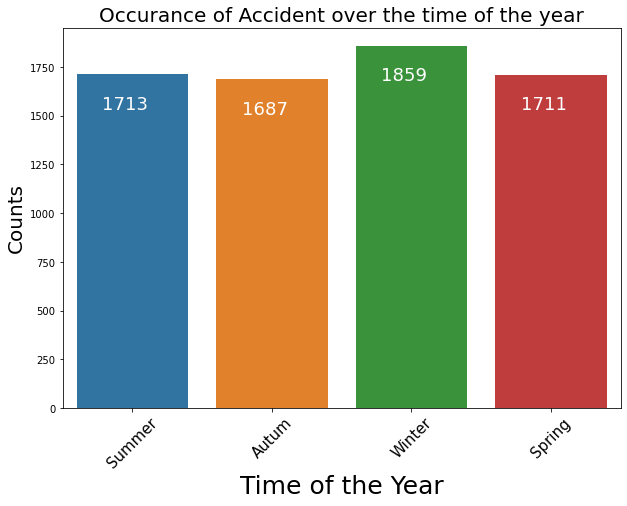

In [46]:
plt.figure(figsize=(10,7))
ax=sns.countplot(period["Year_time"])
plt.xticks(rotation=45,size=15)
plt.xlabel("Time of the Year",size=25)
plt.title("Occurance of Accident over the time of the year",size=20)
plt.ylabel("Counts",size=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

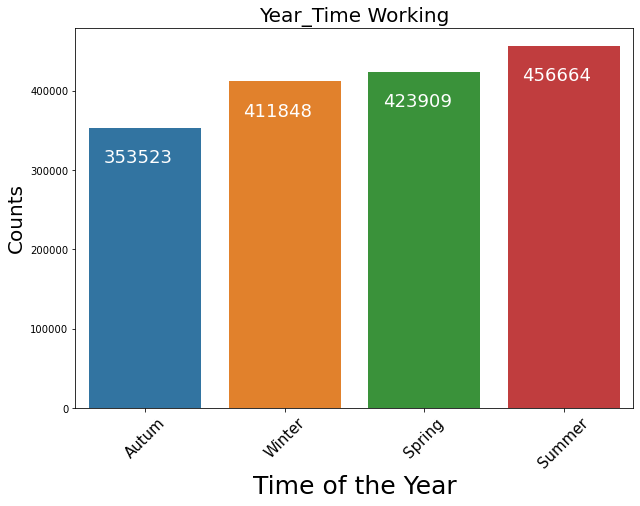

In [47]:
plt.figure(figsize=(10,7))
ax=sns.countplot(period_W["Year_time"])
plt.xticks(rotation=45,size=15)
plt.xlabel("Time of the Year",size=25)
plt.title("Year_Time Working",size=20)
plt.ylabel("Counts",size=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

In [48]:
#probability of likelihood
print(f"probability that  accident occurs  in the Autum is {1687/353523}")
print(f"*****************************************************")
print(f"probability that  accident occurs  in the winter is {1859/411848}")
print(f"*****************************************************")
print(f"probability that  accident occurs  in the Springs is {1711/423909}")
print(f"*****************************************************")
print(f"probability that  accident occurs  in the Summer is {1713/456664}")

probability that  accident occurs  in the Autum is 0.004771966746152301
*****************************************************
probability that  accident occurs  in the winter is 0.004513801208212738
*****************************************************
probability that  accident occurs  in the Springs is 0.0040362436277597315
*****************************************************
probability that  accident occurs  in the Summer is 0.0037511167948425976


In [49]:
chance_data={"Time_of_year":["Autum","Winter","Springs","Summer"],
            "Ratio":[0.0048,0.0045,0.0040,0.0038]}

hood=pd.DataFrame(chance_data)

In [50]:
hood


,Time_of_year,Ratio
0,Autum,0.0048
1,Winter,0.0045
2,Springs,0.0040
3,Summer,0.0038


In [51]:
fig1=px.pie(hood,names="Time_of_year",values="Ratio",title="Percentage of liklihood occurance in time of the year")

fig1.show()


> __This graphs show how there is more injuries in the winter period of the year.__
It occurs that accident happen most time in the winter, it can be due strong wind or weather etc. there are many factor that can be depending on the vegetation of the particular location.  There is no big differences in the time of the year for most accident to happened.


#### Does the month of year 

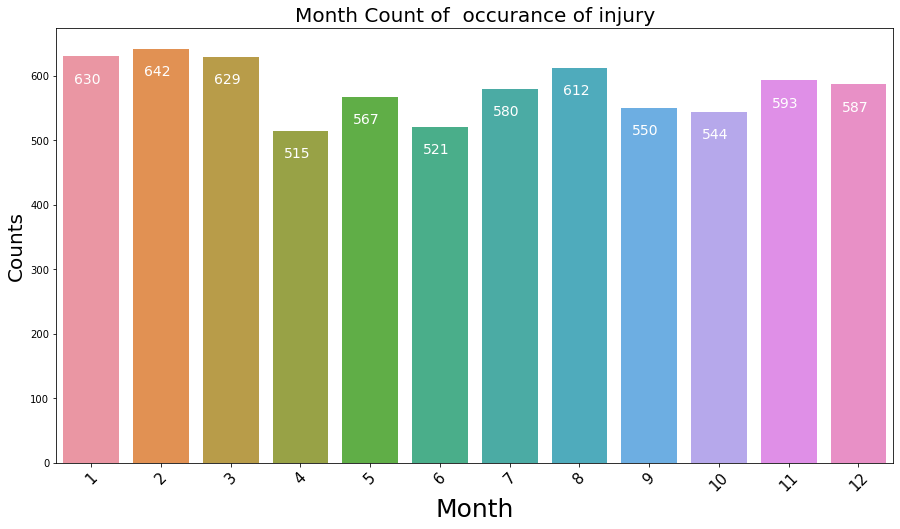

In [52]:
# countplot of incident in each month of the year

plt.figure(figsize=(15,8))
ax=sns.countplot(period["Month"])
plt.xticks(rotation=45,size=15)
plt.xlabel("Month",size=25)
plt.title("Month Count of  occurance of injury",size=20)
plt.ylabel("Counts",size=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=14
                       )
plt.show()

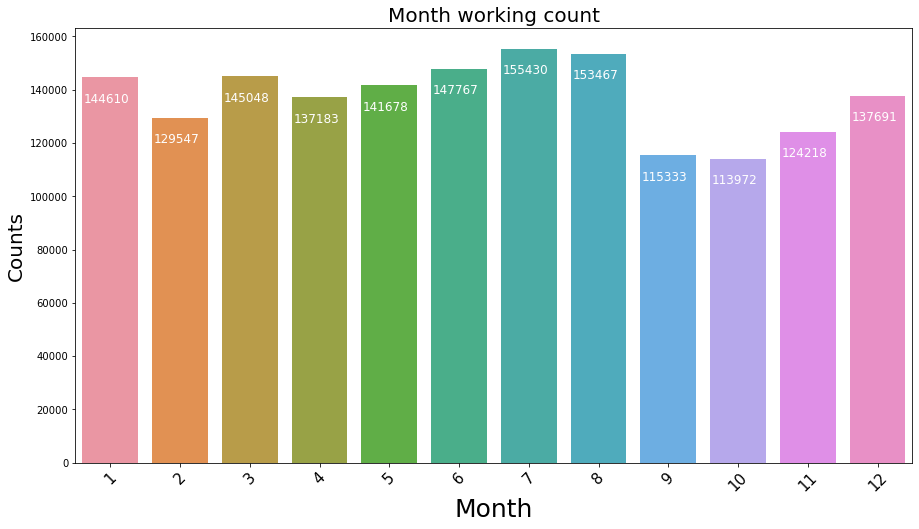

In [53]:
# countplot of how worker works in each month
plt.figure(figsize=(15,8))
ax=sns.countplot(period_W["Month"])
plt.xticks(rotation=45,size=15)
plt.xlabel("Month",size=25)
plt.title("Month working count",size=20)
plt.ylabel("Counts",size=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=12
                   )

plt.show()

In [54]:
# Likelihood chance

In [55]:
incident_count=period.groupby(by="Month")["Month"].count().sort_values(ascending=False).reset_index(name="counts1")


In [56]:
Work_count=period_W.groupby(by="Month")["Month"].count().sort_values(ascending=False).reset_index(name="counts2")

In [57]:
count=incident_count.merge(Work_count[["Month","counts2"]],on="Month")

In [58]:
count["Ratio"]=count["counts1"]/count["counts2"].round(2)
count

,Month,counts1,counts2,Ratio
0,2,642,129547,0.004956
1,1,630,144610,0.004357
2,3,629,145048,0.004336
3,8,612,153467,0.003988
4,11,593,124218,0.004774
5,12,587,137691,0.004263
6,7,580,155430,0.003732
7,5,567,141678,0.004002
8,9,550,115333,0.004769
9,10,544,113972,0.004773


In [59]:
fig1=px.pie(count,names="Month",values="Ratio",title="Percentage of liklihood occurance Month of the year")

fig1.show()


> __This graphs show how there is more injuries in the beginning of  the year.__
It occurs that accident happen most time in the winter, it can be due  more people work in the beginning of year than the end of the year. Most research could be done to know whether 

####  Does Days affect the frequency of occurance?

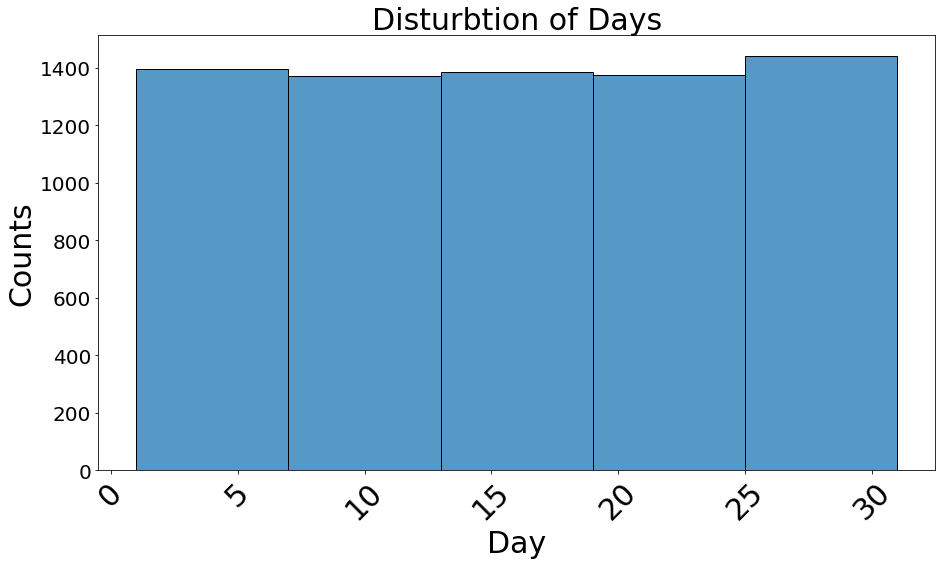

In [60]:
# Histogram 
plt.figure(figsize=(15,8))
sns.histplot(period['Day'],bins=5)
plt.title("Disturbtion of Days",size=30)
plt.xticks(rotation=45,size=30)
plt.xlabel("Day",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=20)
plt.show()

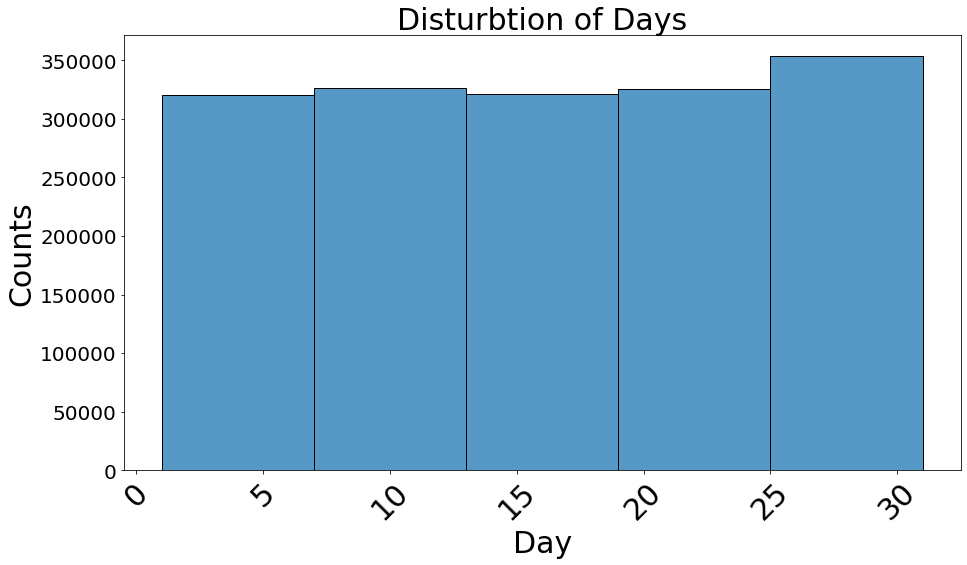

In [61]:
plt.figure(figsize=(15,8))
sns.histplot(period_W['Day'],bins=5)
plt.title("Disturbtion of Days",size=30)
plt.xticks(rotation=45,size=30)
plt.xlabel("Day",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=20)
plt.show()

>> It show that incident follow same pattern as the working day

#### Daylight time affect the occurance

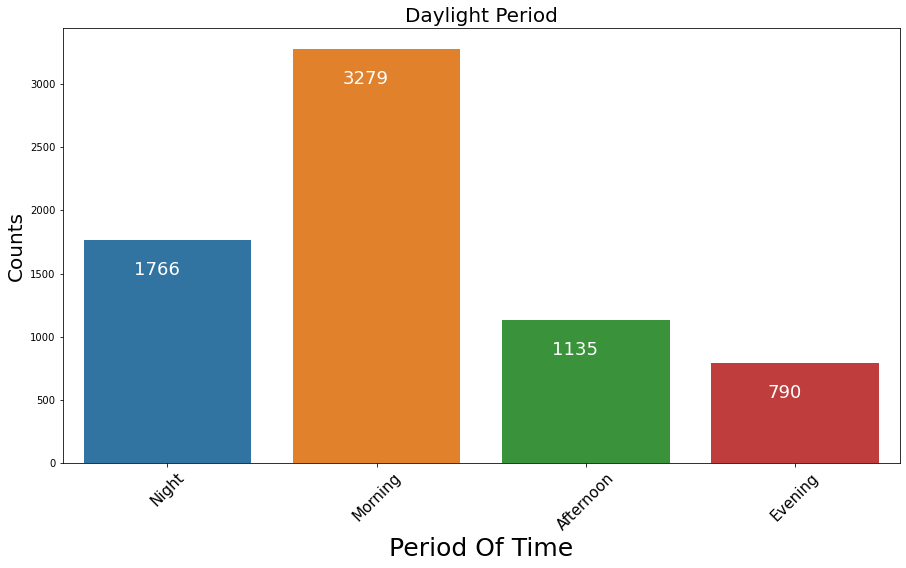

In [62]:

plt.figure(figsize=(15,8))
ax=sns.countplot(period["Period_time"])
plt.xticks(rotation=45,size=15)
plt.xlabel("Period Of Time",size=25)
plt.title("Daylight Period",size=20)
plt.ylabel("Counts",size=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

#### Days of week

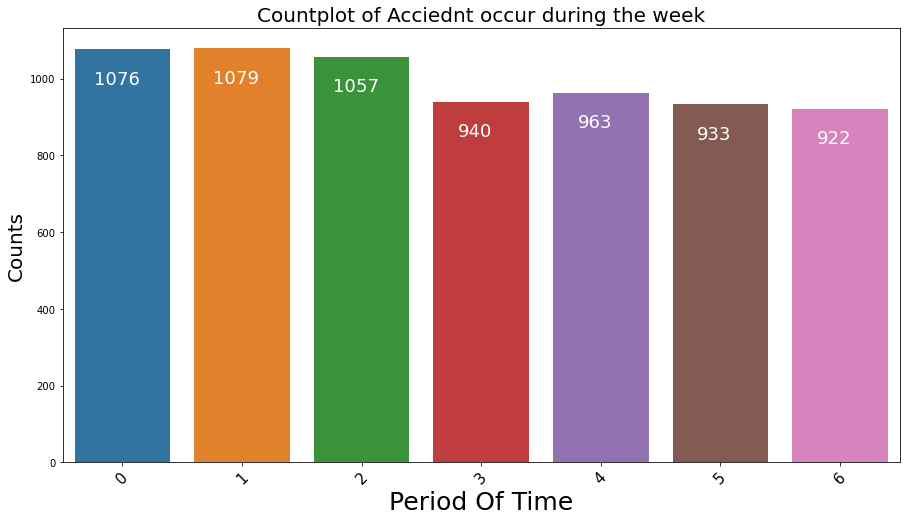

In [63]:

plt.figure(figsize=(15,8))
ax=sns.countplot(period["Day_of_week"])
plt.xticks(rotation=45,size=15)
plt.xlabel("Period Of Time",size=25)
plt.title("Countplot of Acciednt occur during the week",size=20)
plt.ylabel("Counts",size=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

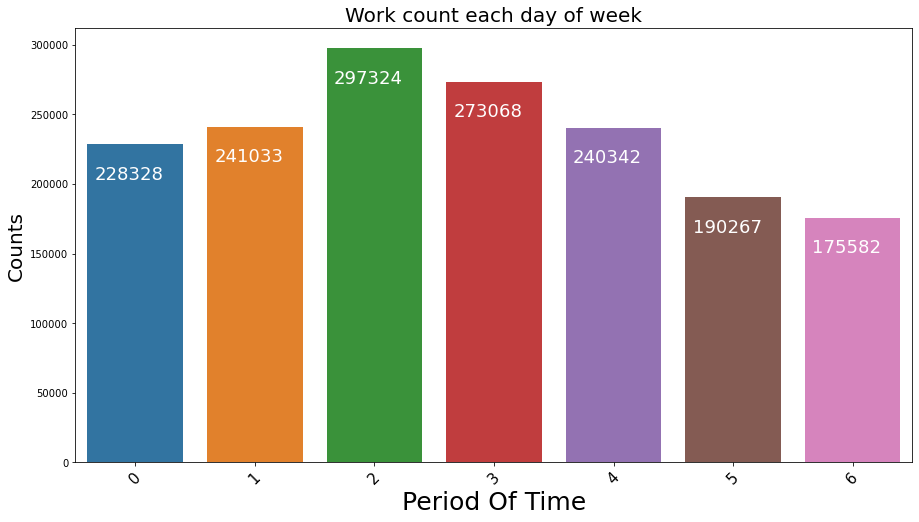

In [64]:
plt.figure(figsize=(15,8))
ax=sns.countplot(period_W["Day_of_week"])
plt.xticks(rotation=45,size=15)
plt.xlabel("Period Of Time",size=25)
plt.title("Work count each day of week",size=20)
plt.ylabel("Counts",size=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

#### Daylight

In [65]:
site_location.head()

,site_key_hashed,lat,lon
0,bf4065199d70073b,-20.708176,140.504777
1,53030efca88e7301,-25.259735,151.435822
2,28163a97aea8a693,-31.322330,119.125864
3,da820a60662e5c87,-20.220901,146.204969
4,350755ad348968b9,-24.929380,150.087177


In [66]:
site_location.columns

Index(['site_key_hashed', 'lat', 'lon'], dtype='object')

In [67]:
import datetime
import pytz
from tzwhere import tzwhere
daylight=[]
site_name_list=[]
tzwhere = tzwhere.tzwhere()
for lat,log,site_name in zip(site_location["lat"],site_location["lon"],site_location["site_key_hashed"]):
    timezone_str = tzwhere.tzNameAt(lat,log)
    site_name_list.append(site_name)
    daylight.append(timezone_str)

In [68]:
for a,b in zip(site_name_list,daylight):
    print(f"the site named  { a} has daylight saving {b}")

the site named  bf4065199d70073b has daylight saving Australia/Brisbane
the site named  53030efca88e7301 has daylight saving Australia/Brisbane
the site named  28163a97aea8a693 has daylight saving Australia/Perth
the site named  da820a60662e5c87 has daylight saving Australia/Brisbane
the site named  350755ad348968b9 has daylight saving Australia/Brisbane
the site named  30c6f1d4634a0268 has daylight saving Australia/Brisbane
the site named  6d4b7ee99aebdab7 has daylight saving America/Winnipeg
the site named  49d11ae6ef35a6f5 has daylight saving Australia/Perth
the site named  0433d3a999a796c6 has daylight saving Australia/Brisbane
the site named  50651de7b22d9862 has daylight saving Australia/Brisbane


In [69]:
daylight=[]
for name in period["site_key_hashed"]:
    if "6d4b7ee99aebdab7" in name:
        daylight.append("America/Winnipeg")
    elif name in ["28163a97aea8a693","49d11ae6ef35a6f5"]:
        daylight.append("Australia/Perth")
    elif name in ["bf4065199d70073b","53030efca88e7301","da820a60662e5c87","350755ad348968b9","30c6f1d4634a0268","0433d3a999a796c6","50651de7b22d9862"]:
        daylight.append("Australia/Brisbane")
    else:
        daylight.append("Null Location")
                        

In [70]:
period["daylight"]=daylight

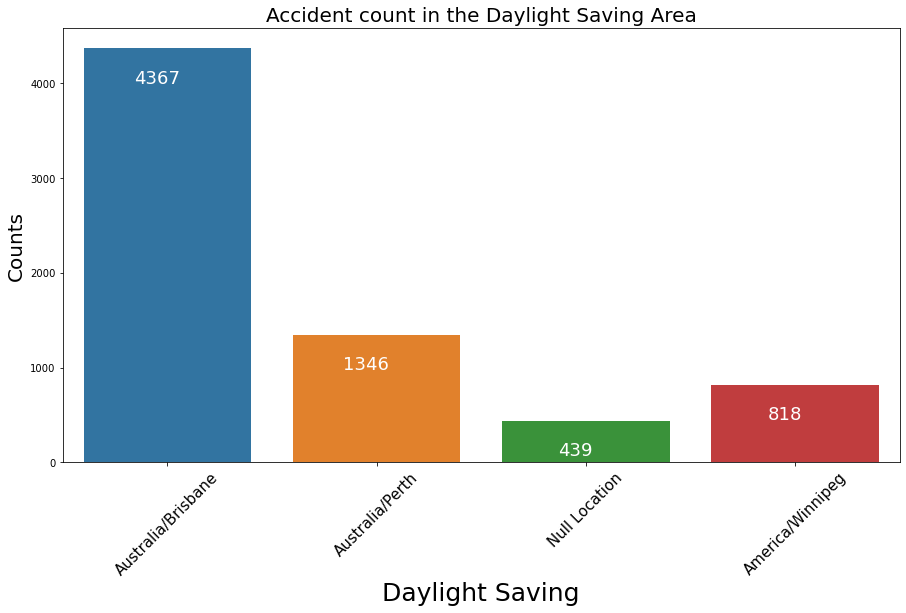

In [71]:

plt.figure(figsize=(15,8))
ax=sns.countplot(period["daylight"])
plt.xticks(rotation=45,size=15)
plt.xlabel("Daylight Saving",size=25)
plt.title("Accident count in the Daylight Saving Area",size=20)
plt.ylabel("Counts",size=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

### Can we better understand where / when incidents are occurring? With which teams? And, related to what types of activities?


> To explore this question, I will first plot the map of the location since the site_location i.e latitude and longtitude  we can get where where.
- I will first plot a countplot chart for the occurance of accident in the site_location. At Each site location i wil plot the teams countplot and type of injury to know which teams and injures involved.

In [72]:
import folium
map=folium.Map(zoom_start=14, control_scale=True)

In [73]:
for index, location_info in site_location.iterrows():
    folium.Marker([location_info["lat"], location_info["lon"]], popup=location_info["site_key_hashed"]).add_to(map)

In [74]:
map

In [75]:
site_location["site_key_hashed"].nunique() 
site_location["site_key_hashed"].unique() 


array(['bf4065199d70073b', '53030efca88e7301', '28163a97aea8a693',
       'da820a60662e5c87', '350755ad348968b9', '30c6f1d4634a0268',
       '6d4b7ee99aebdab7', '49d11ae6ef35a6f5', '0433d3a999a796c6',
       '50651de7b22d9862'], dtype=object)

> There is only 10 location out of 15 llocation of the accident reported ther latitude and longtitude

> **Count PLot**

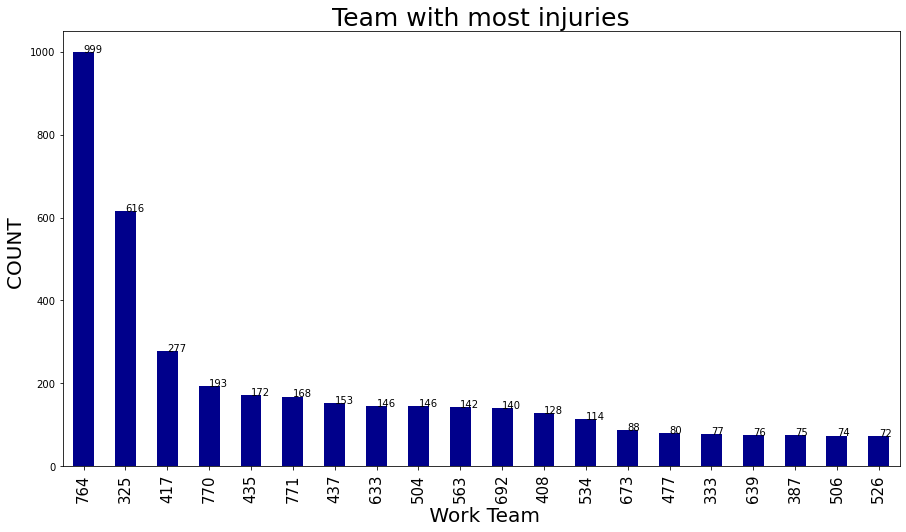

In [76]:
plt.figure(figsize=(15,8))
site_key_count=safety["WorkGroupId"].value_counts()
ax=site_key_count[:20].plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel(" Work Team",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Team with most injuries",size=25)
plt.show()

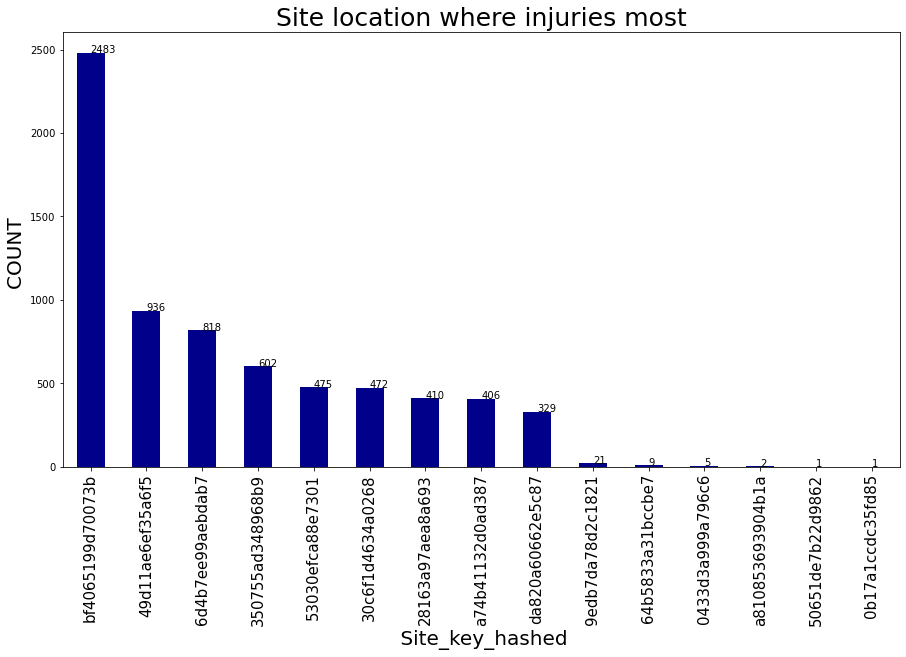

In [77]:
plt.figure(figsize=(15,8))
site_key_count=safety["site_key_hashed"].value_counts()
ax=site_key_count.plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel(" Site_key_hashed",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Site location where injuries most",size=25)
plt.show()

>> At each site let look at the team with incient and what activities involved

In [78]:
 #Analysing  based on the site_location

safety_loc1=safety.query("site_key_hashed=='bf4065199d70073b'")

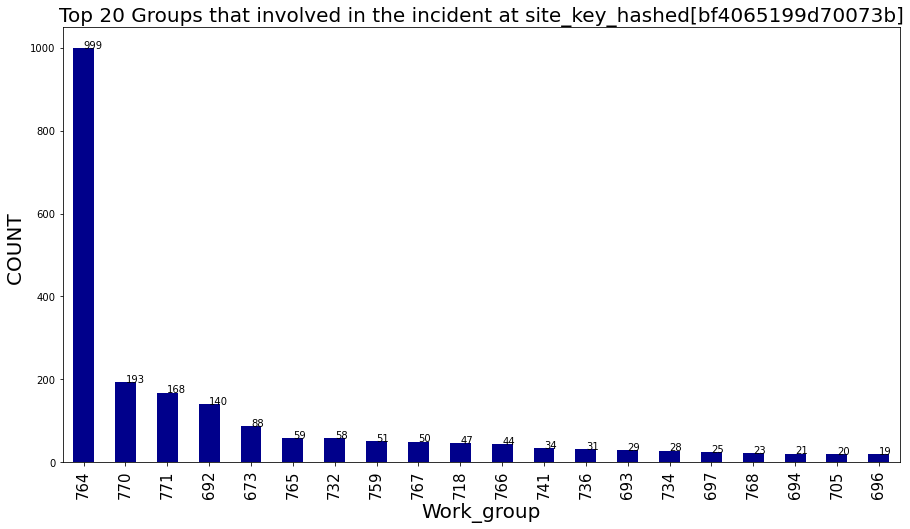

In [79]:
#Teams involved in site_key_hashed(bf4065199d70073b)
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc1["WorkGroupId"].value_counts()
ax=WorkGroup_count[:20].plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Top 20 Groups that involved in the incident at site_key_hashed[bf4065199d70073b]",size=20)
plt.show()

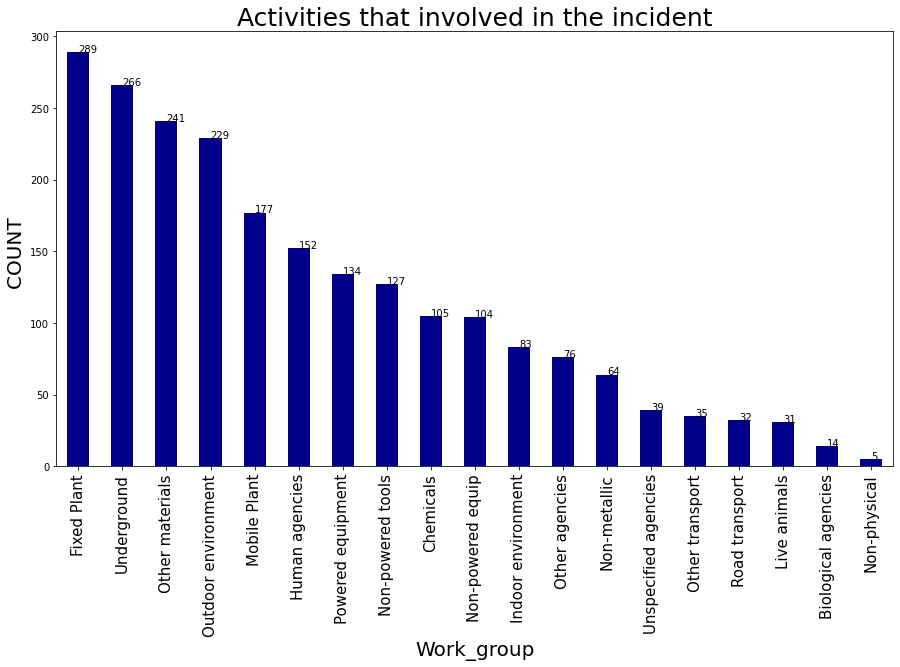

In [80]:
#types of activities involved at the site 
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc1["AgencyOfInjury"].value_counts()
ax=WorkGroup_count.plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Activities that involved in the incident",size=25)
plt.show()

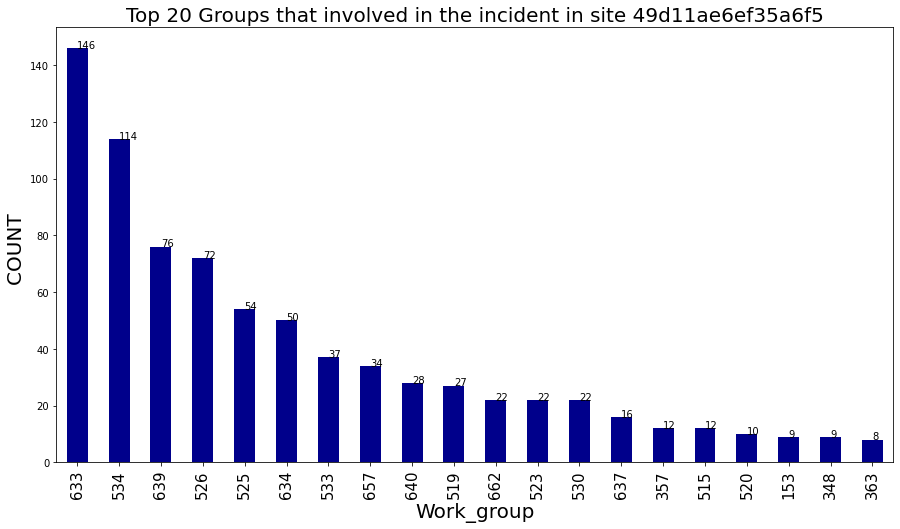

In [81]:
# second site with highest accident
safety_loc2=safety.query("site_key_hashed=='49d11ae6ef35a6f5'")
#Teams involved in site_key_hashed(49d11ae6ef35a6f5)
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc2["WorkGroupId"].value_counts()
ax=WorkGroup_count[:20].plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Top 20 Groups that involved in the incident in site 49d11ae6ef35a6f5",size=20)
plt.show()

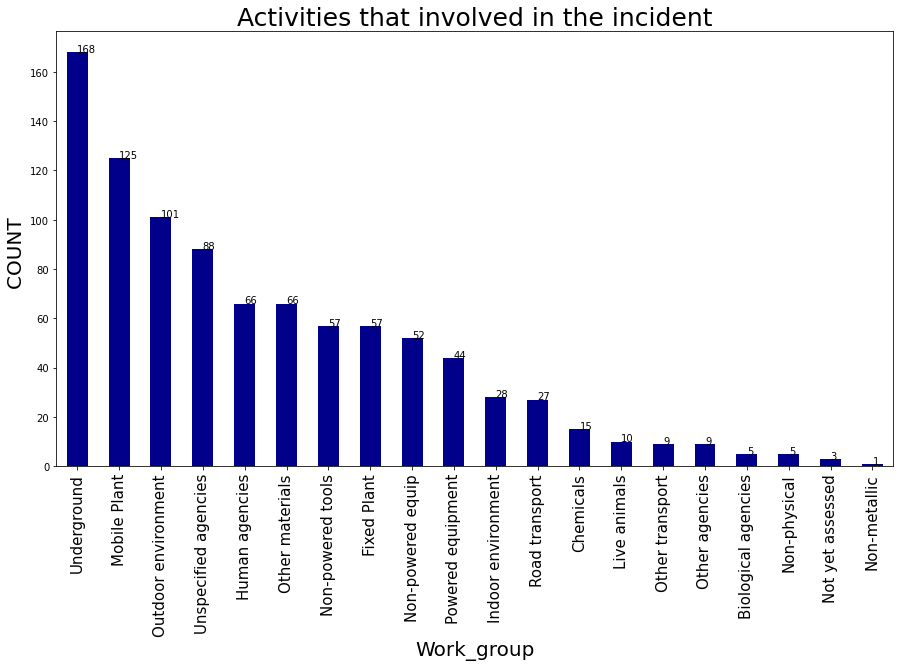

In [82]:
#types of activities involved at the site 
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc2["AgencyOfInjury"].value_counts()
ax=WorkGroup_count.plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Activities that involved in the incident",size=25)
plt.show()

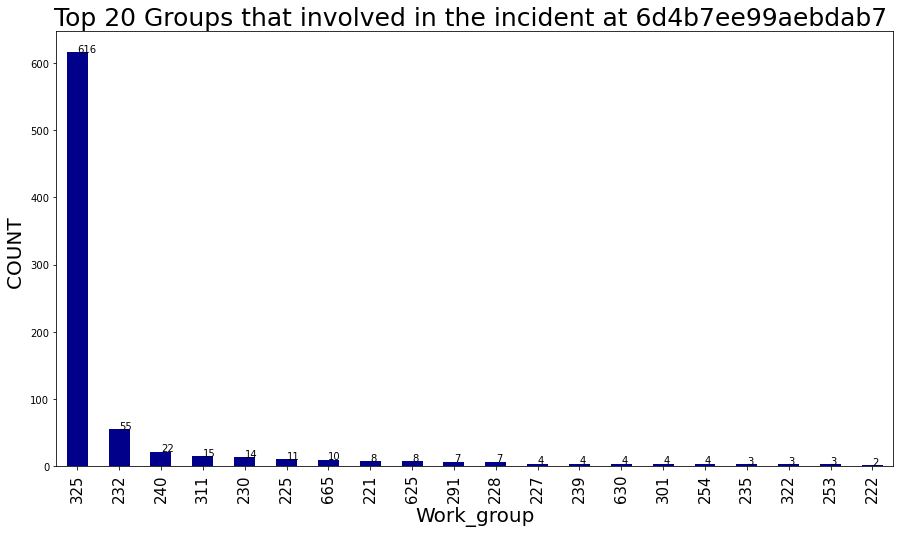

In [83]:
# third site with highest accident
safety_loc3=safety.query("site_key_hashed=='6d4b7ee99aebdab7'")
#Teams involved in site_key_hashed(6d4b7ee99aebdab7 )
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc3["WorkGroupId"].value_counts()
ax=WorkGroup_count[:20].plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Top 20 Groups that involved in the incident at 6d4b7ee99aebdab7 ",size=25)
plt.show()

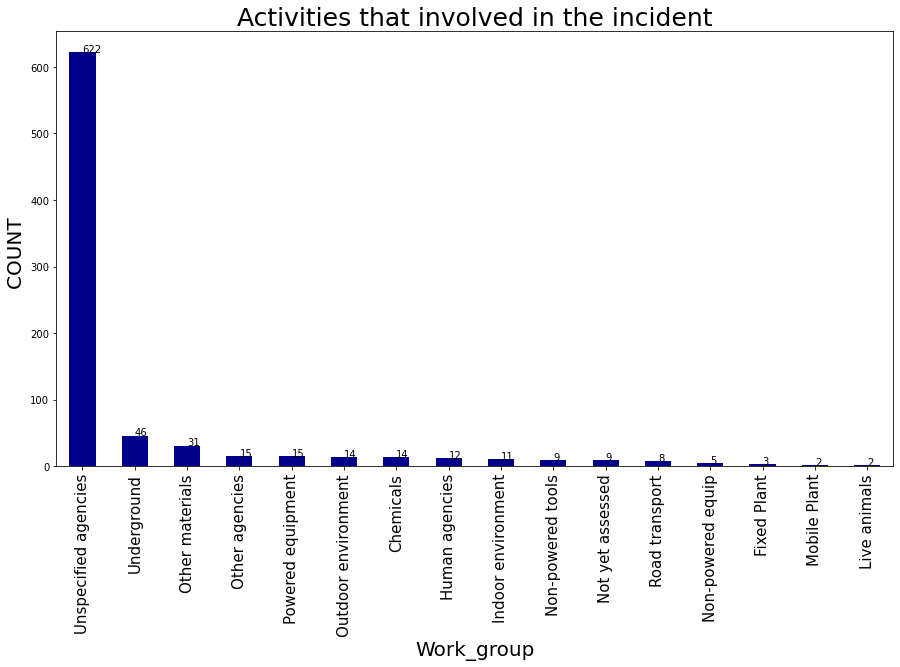

In [84]:
#types of activities involved at the site 
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc3["AgencyOfInjury"].value_counts()
ax=WorkGroup_count.plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Activities that involved in the incident",size=25)
plt.show()

In [85]:
safety["site_key_hashed"].value_counts()

bf4065199d70073b    2483
49d11ae6ef35a6f5     936
6d4b7ee99aebdab7     818
350755ad348968b9     602
53030efca88e7301     475
30c6f1d4634a0268     472
28163a97aea8a693     410
a74b41132d0ad387     406
da820a60662e5c87     329
9edb7da78d2c1821      21
64b5833a31bccbe7       9
0433d3a999a796c6       5
a810853693904b1a       2
50651de7b22d9862       1
0b17a1ccdc35fd85       1
Name: site_key_hashed, dtype: int64

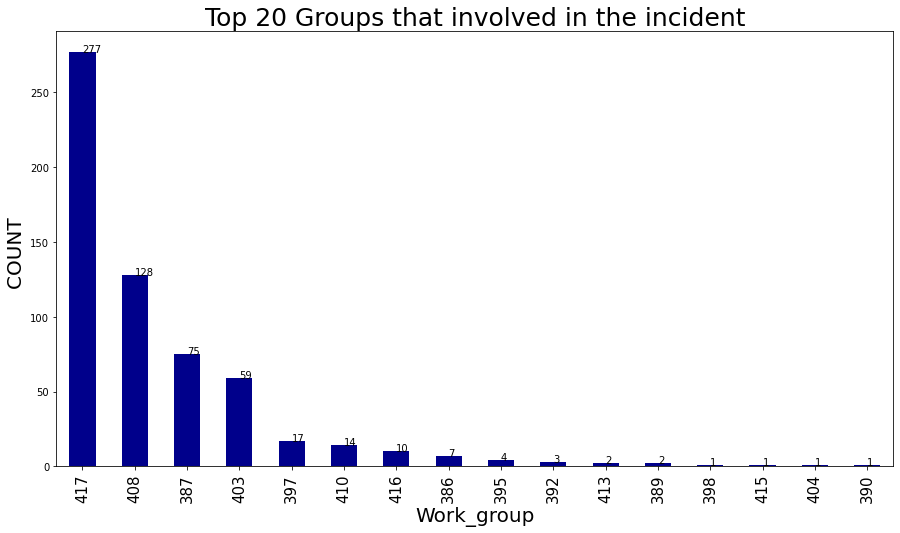

In [86]:
# site 4
safety_loc4=safety.query("site_key_hashed=='350755ad348968b9'")
#Teams involved in site_key_hashed(350755ad348968b9)
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc4["WorkGroupId"].value_counts()
ax=WorkGroup_count[:20].plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Top 20 Groups that involved in the incident",size=25)
plt.show()

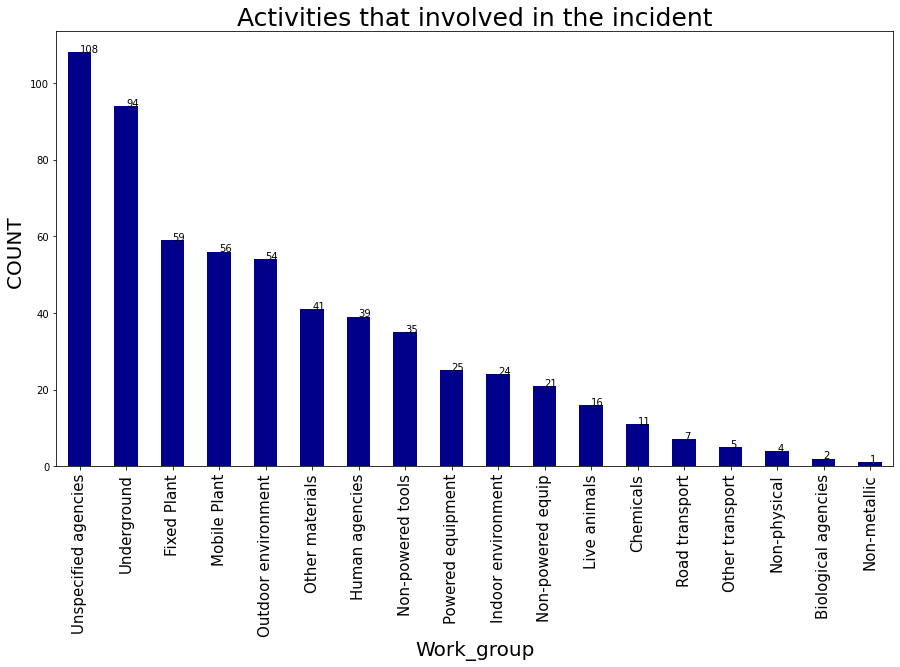

In [87]:
#types of activities involved at the site 
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc4["AgencyOfInjury"].value_counts()
ax=WorkGroup_count.plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Activities that involved in the incident",size=25)
plt.show()

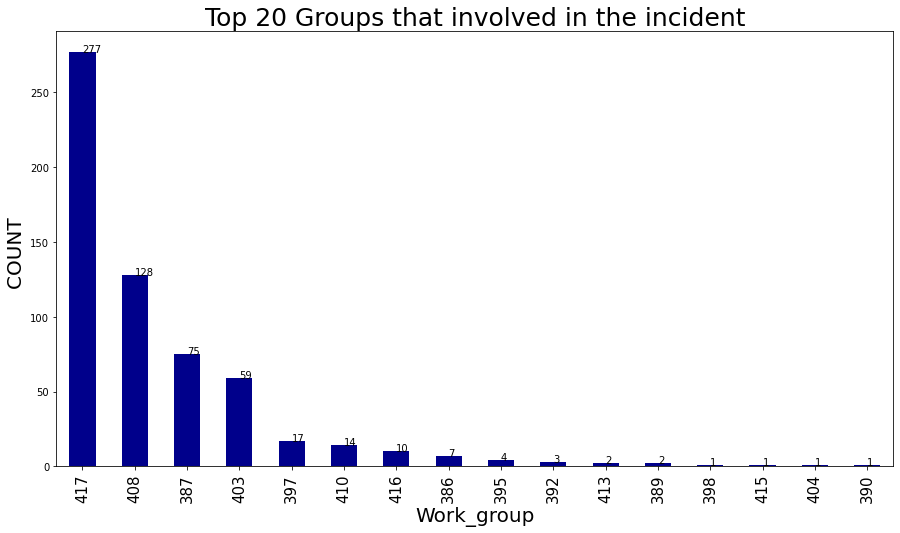

In [88]:
# site 5
safety_loc5=safety.query("site_key_hashed=='53030efca88e7301'")
#Teams involved in site_key_hashed(53030efca88e7301 )
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc4["WorkGroupId"].value_counts()
ax=WorkGroup_count[:20].plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Top 20 Groups that involved in the incident",size=25)
plt.show()

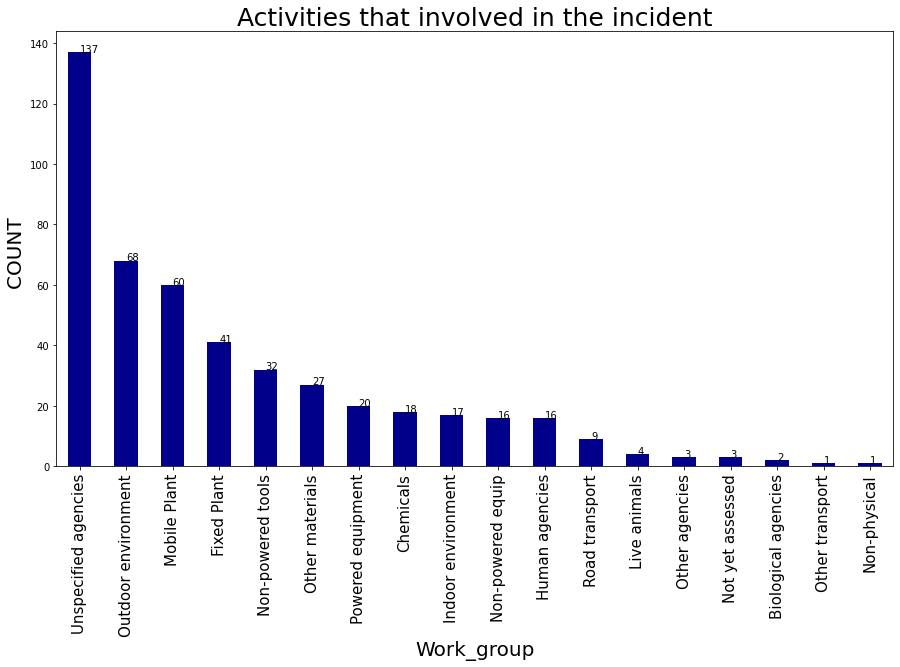

In [89]:
#types of activities involved at the site 
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc5["AgencyOfInjury"].value_counts()
ax=WorkGroup_count.plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Activities that involved in the incident",size=25)
plt.show()

### Is there any pattern within the prevalence of certain types of injuries? Are any specific body parts always involved? How is injury severity seen to differ?

> I will explore this question by grouping by the types of injuries and check abd calculte the prevalence rate of th

Prevalence
Definition of prevalence
Prevalence, sometimes referred to as prevalence rate, is the proportion of persons in a population who have a particular disease or attribute at a specified point in time or over a specified period of time. Prevalence differs from incidence in that prevalence includes all cases, both new and preexisting, in the population at the specified time, whereas incidence is limited to new cases only.

Point prevalence refers to the prevalence measured at a particular point in time. It is the proportion of persons with a particular disease or attribute on a particular date.

Period prevalence refers to prevalence measured over an interval of time. It is the proportion of persons with a particular disease or attribute at any time during the interval.

In [90]:
safety["Injury"].value_counts()

First Aid Injury               4698
No Treatment                   1007
Medical Treatment Injury        455
Restricted Work Injury          336
Non Work                        315
Lost Time Injury                154
Occupational Injury/illness       5
Name: Injury, dtype: int64

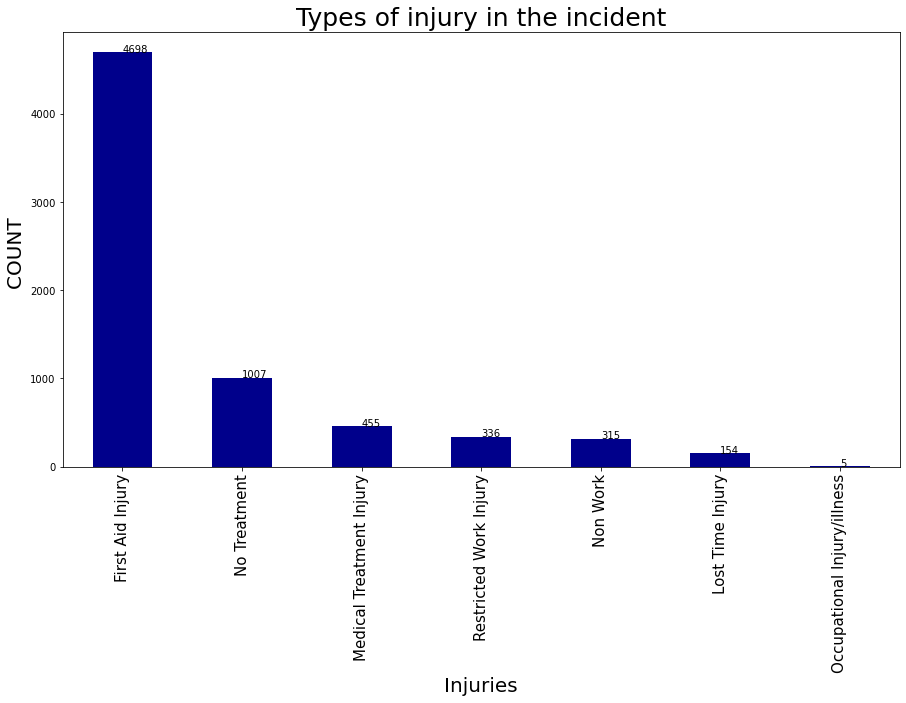

In [91]:
plt.figure(figsize=(15,8))
WorkGroup_count=safety["Injury"].value_counts()
ax=WorkGroup_count.plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Injuries",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Types of injury in the incident",size=25)
plt.show()

In [92]:
safety_new=safety.copy()
safety_new["Month_Year"]=pd.to_datetime(safety_new["day"]).dt.strftime('%Y-%m')

In [93]:
grp=safety_new.groupby(by="Month_Year")["Injury"].count().sort_values().reset_index(name="counts")
grp1=safety_new.groupby(by=["Month_Year","Injury"])["AgencyOfInjury",].count().sort_values(by="Month_Year").reset_index()

In [94]:
grp1

,Month_Year,Injury,AgencyOfInjury
0,2000-06,Medical Treatment Injury,2
1,2000-07,Medical Treatment Injury,1
2,2000-07,Restricted Work Injury,1
3,2000-08,Medical Treatment Injury,4
4,2000-10,Lost Time Injury,1
...,...,...,...
897,2022-08,Medical Treatment Injury,4
898,2022-09,Medical Treatment Injury,1
899,2022-09,No Treatment,2
900,2022-09,First Aid Injury,7


In [95]:
grp1["Month_Year"]=pd.to_datetime(grp1["Month_Year"])
grp1.set_index("Month_Year",inplace=True)

In [96]:
ts=grp1["AgencyOfInjury"]

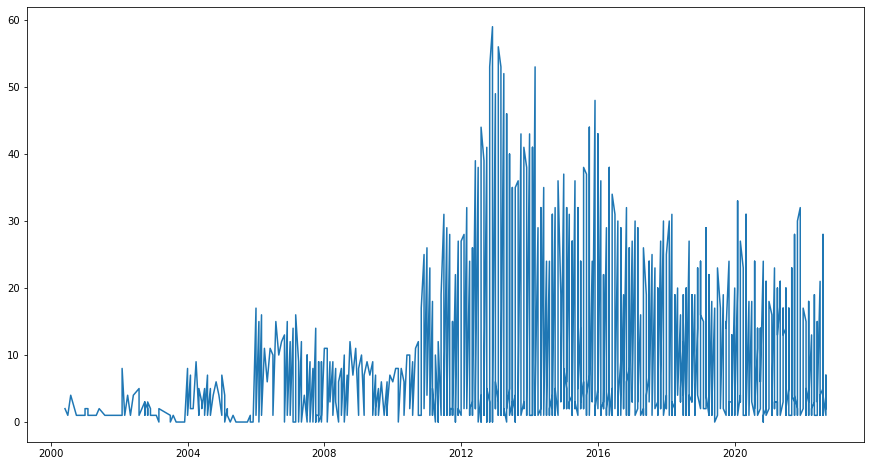

In [97]:
plt.figure(figsize=(15,8))
plt.plot(ts)

In [98]:
import plotly.express as px

fig = px.line(grp1, y='AgencyOfInjury', color='Injury')
fig.show()

  **Are any specific body parts always involved?**

> First_aid injury


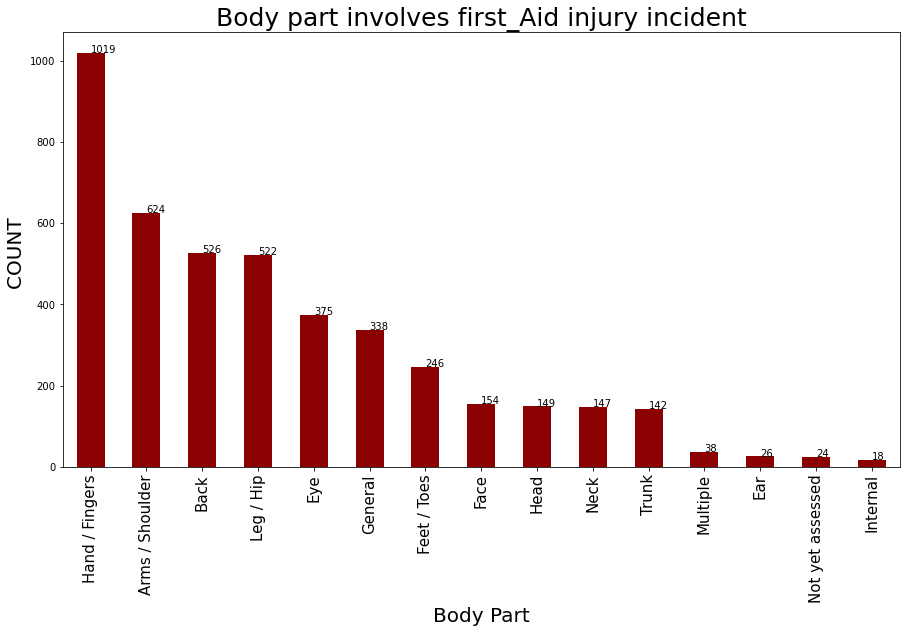

In [99]:
plt.figure(figsize=(15,8))
injury_first=safety.query("Injury=='First Aid Injury' ")
first_count=injury_first["BodyPart"].value_counts()
ax=first_count.plot.bar(color="darkred")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Body Part",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Body part involves first_Aid injury incident",size=25)
plt.show()

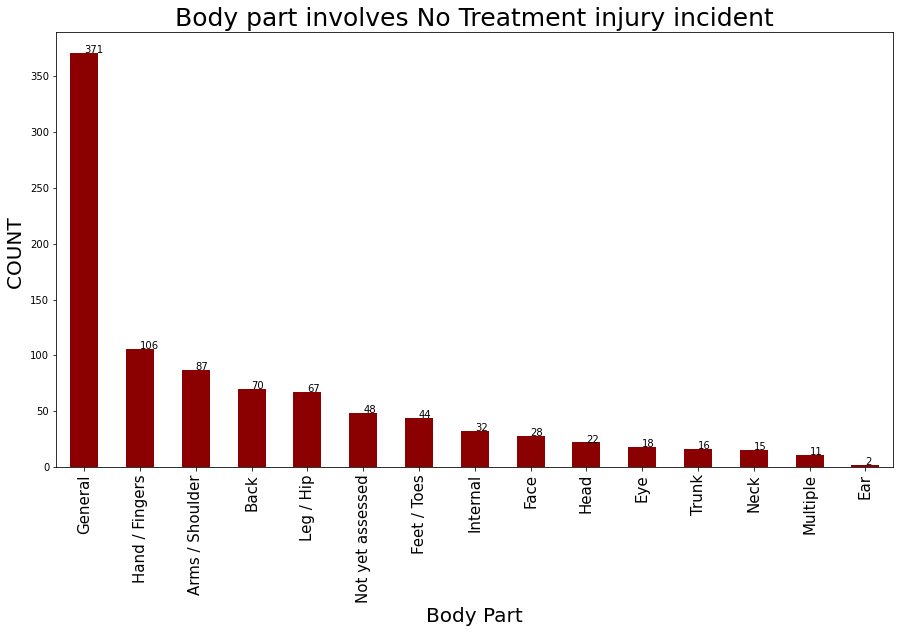

In [100]:
## No-Treatment injury
plt.figure(figsize=(15,8))
injury_cat=safety.query("Injury=='No Treatment' ")
first_count=injury_cat["BodyPart"].value_counts()
ax=first_count.plot.bar(color="darkred")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Body Part",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Body part involves No Treatment injury incident",size=25)
plt.show()

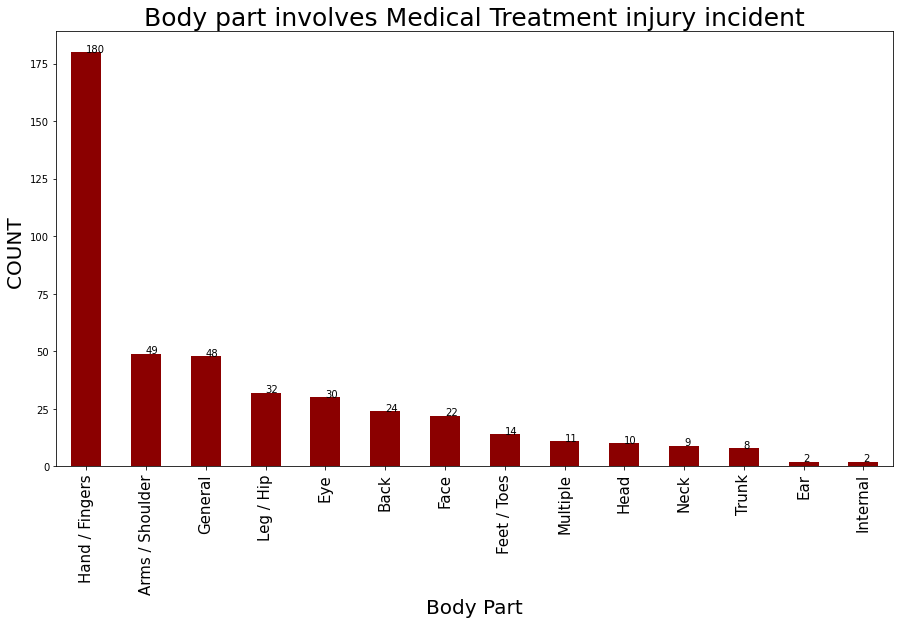

In [101]:
## Medical Treatment injury
plt.figure(figsize=(15,8))
injury_med=safety.query("Injury=='Medical Treatment Injury' ")
first_count=injury_med["BodyPart"].value_counts()
ax=first_count.plot.bar(color="darkred")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Body Part",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Body part involves Medical Treatment injury incident",size=25)
plt.show()

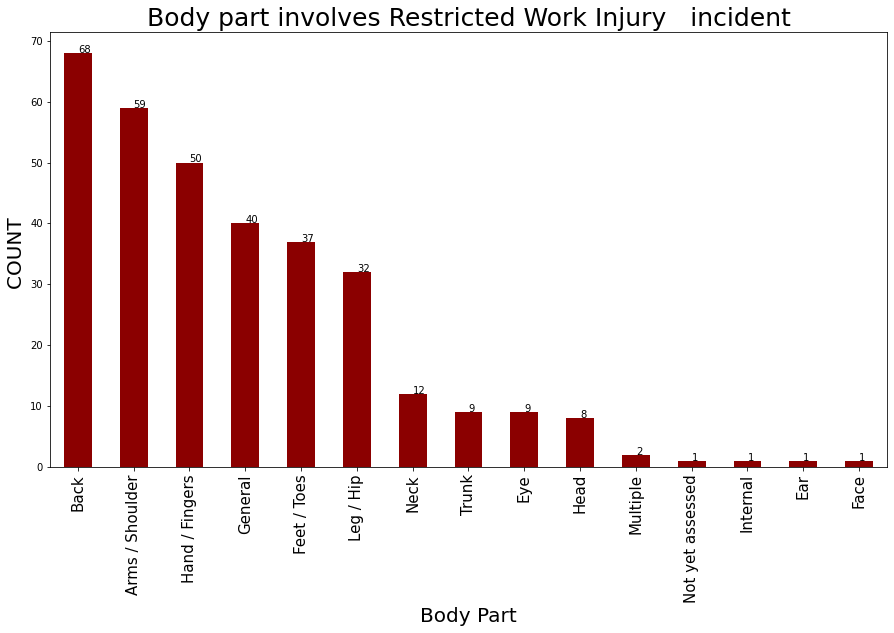

In [102]:
## Restricted Work Injury  
plt.figure(figsize=(15,8))
injury_Res=safety.query("Injury=='Restricted Work Injury' ")
first_count=injury_Res["BodyPart"].value_counts()
ax=first_count.plot.bar(color="darkred")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Body Part",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Body part involves Restricted Work Injury   incident",size=25)
plt.show()


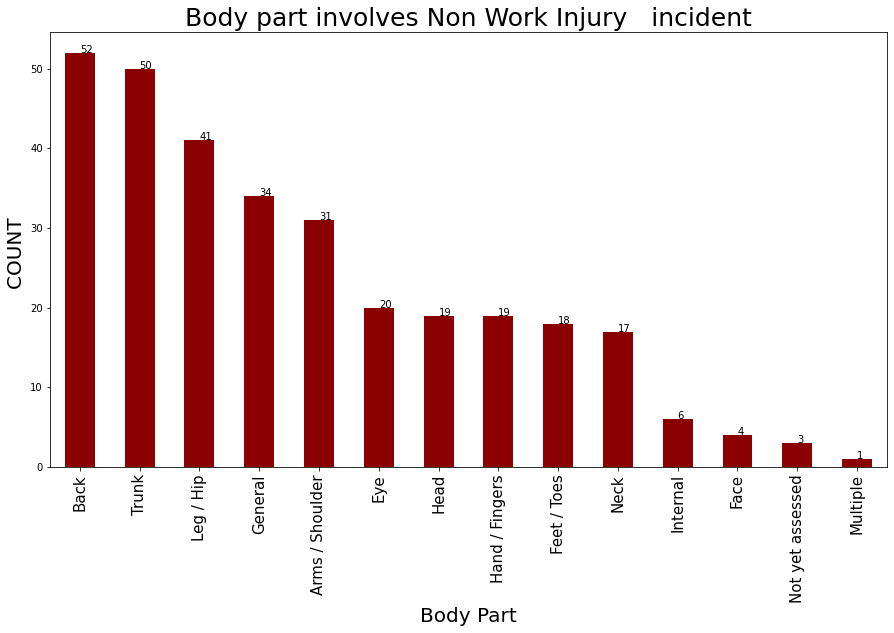

In [103]:
## Non Work  
plt.figure(figsize=(15,8))
injury_Non=safety.query("Injury=='Non Work' ")
first_count=injury_Non["BodyPart"].value_counts()
ax=first_count.plot.bar(color="darkred")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Body Part",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Body part involves Non Work Injury   incident",size=25)
plt.show()

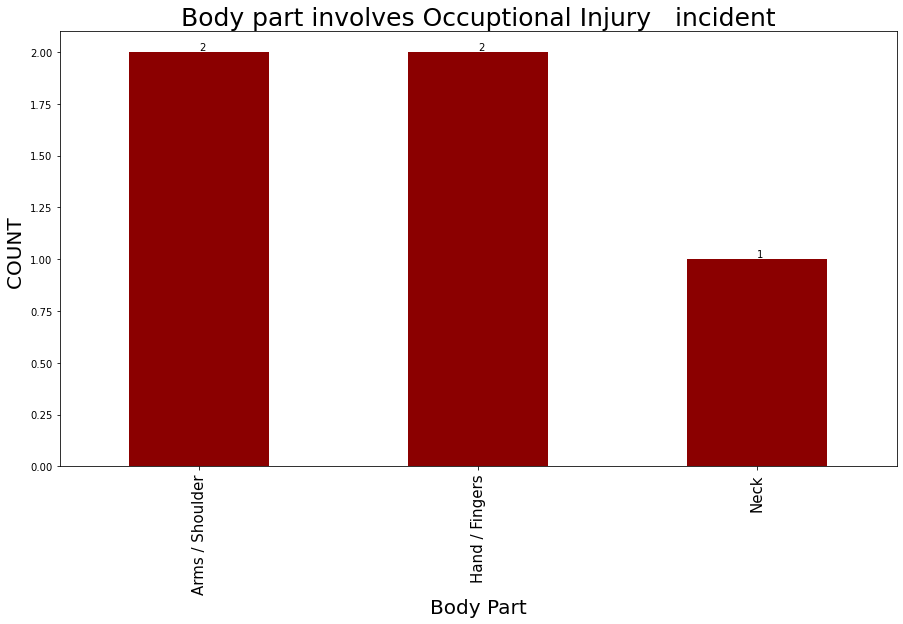

In [104]:
## Occuptional Injury/illeness
plt.figure(figsize=(15,8))
injury_Non=safety.query("Injury=='Occupational Injury/illness' ")
first_count=injury_Non["BodyPart"].value_counts()
ax=first_count.plot.bar(color="darkred")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Body Part",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Body part involves Occuptional Injury   incident",size=25)
plt.show()

**How is injury severity seen to differ?**

> Severity rate is a safety metric which companies and projects use to measure how critical or serious the injuries and illnesses sustained in a period of time were by using the number of lost days (on average) per accident as a proxy for severity.

In [105]:
df_Prim=safety.groupby(by="Injury",)["LTIDays"].sum().reset_index().sort_values(ascending=False,by="LTIDays")
df_Prim["severity rate"]=((df_Prim["LTIDays"]*12)/(sum(labour_hours["total_hours_worked"])))

In [106]:
df_Prim


,Injury,LTIDays,severity rate
0,First Aid Injury,13718732,3.028273
3,No Treatment,1865419,0.411773
2,Medical Treatment Injury,1433386,0.316406
6,Restricted Work Injury,846196,0.186789
4,Non Work,514707,0.113616
1,Lost Time Injury,375346,0.082854
5,Occupational Injury/illness,2862,0.000632


In [107]:
fig1=px.pie(df_Prim,names="Injury",values="severity rate",title="injury severity seen to differ")

fig1.show()

### Does the weather (strong winds, high temperature, lots of rain) impact the frequency, or severity, of safety incidents?

In [108]:
period["daylight"].unique()

array(['Australia/Brisbane', 'Australia/Perth', 'Null Location',
       'America/Winnipeg'], dtype=object)

>> In Brisbane, the summer started  in December and end in Feb, there is more of rain.

Perth has a hot-summer Mediterranean climate. It is the windiest city in Australia. It is also considered to be the third windiest capital city in the world. Perth is also the sunniest city in Australia.



Is Winnipeg the coldest city in the world?
With an average annual temperature of 38 degrees, Winnipeg is far from being the coldest city on the Earth. (Chicago's average annual temperature, by comparison, is about 50 degrees, depending on the location.

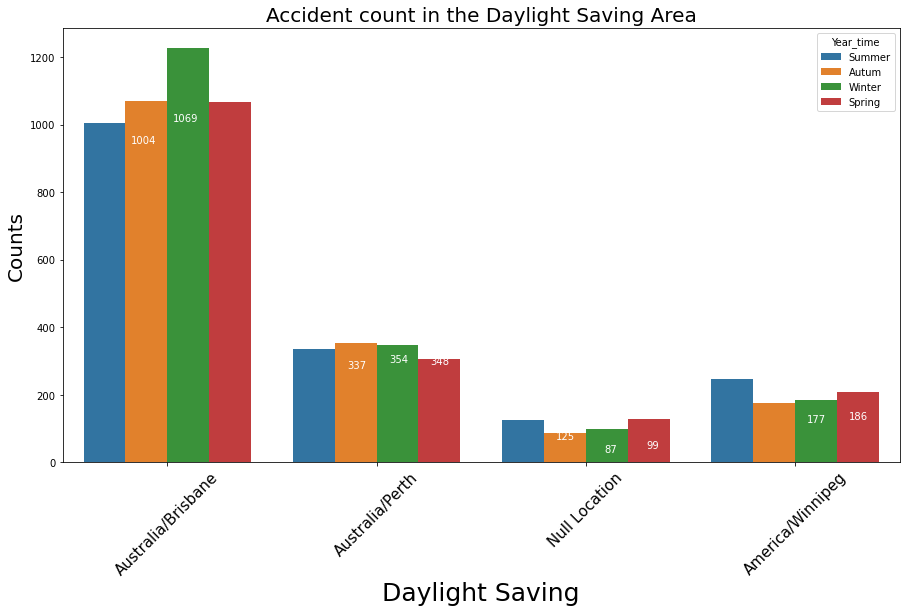

In [109]:

plt.figure(figsize=(15,8))
ax=sns.countplot(period["daylight"],hue=period["Year_time"])

plt.xticks(rotation=45,size=15)
plt.xlabel("Daylight Saving",size=25)
plt.title("Accident count in the Daylight Saving Area",size=20)
plt.ylabel("Counts",size=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='right', va='top', color='white', size=10)
plt.show()

### Do production rates influence the safety outcomes on-site?



In [110]:
production_data.describe()

,acutal_tonnes_moved,budgeted_tonnes_moved,short_range_forecast_tonnes_moved,half_2_forecast_tonnes_moved
count,7047.000000,7047.000000,7047.000000,7047.000000
mean,29091.769875,17948.819447,16077.097436,6012.602702
std,26190.414065,24122.698539,24307.214292,16848.075228
min,0.000000,0.000000,0.000000,0.000000
25%,3752.500000,0.000000,0.000000,0.000000
50%,26078.200000,0.000000,0.000000,0.000000
75%,43344.030000,34574.697931,30645.162403,0.000000
max,129811.308140,84827.217742,93299.387816,83397.843667


In [111]:
prod=production_data.copy()
new_safety=safety.copy()
prod.head()

,site_key_hashed,date,acutal_tonnes_moved,budgeted_tonnes_moved,short_range_forecast_tonnes_moved,half_2_forecast_tonnes_moved
0,a74b41132d0ad387,2017-07-01T00:00:00Z,39042.188656,0.0,0.0,0.0
1,a74b41132d0ad387,2017-07-02T00:00:00Z,38791.520670,0.0,0.0,0.0
2,a74b41132d0ad387,2017-07-03T00:00:00Z,33582.424954,0.0,0.0,0.0
3,a74b41132d0ad387,2017-07-04T00:00:00Z,41595.197980,0.0,0.0,0.0
4,a74b41132d0ad387,2017-07-05T00:00:00Z,41156.497770,0.0,0.0,0.0


In [112]:
new_safety.rename(columns={"day":"date"},inplace=True)

In [113]:

prod["date"]=pd.to_datetime(prod["date"])
new_safety["date"]=pd.to_datetime(new_safety['date'])

In [114]:
prod["date"]=prod["date"].dt.date

In [115]:
prod["date"]=pd.to_datetime(prod["date"])

In [116]:
sf_prod=new_safety.merge(prod[['date', 'acutal_tonnes_moved',
       'budgeted_tonnes_moved', 'short_range_forecast_tonnes_moved',
       'half_2_forecast_tonnes_moved']],on="date")

In [117]:
# Using 26078 tonnes  as the Threshold for the production which is the mean
# Production Generally
High_Production=prod[prod['acutal_tonnes_moved']>=26078]
Low_production=prod[prod['acutal_tonnes_moved']<26078]

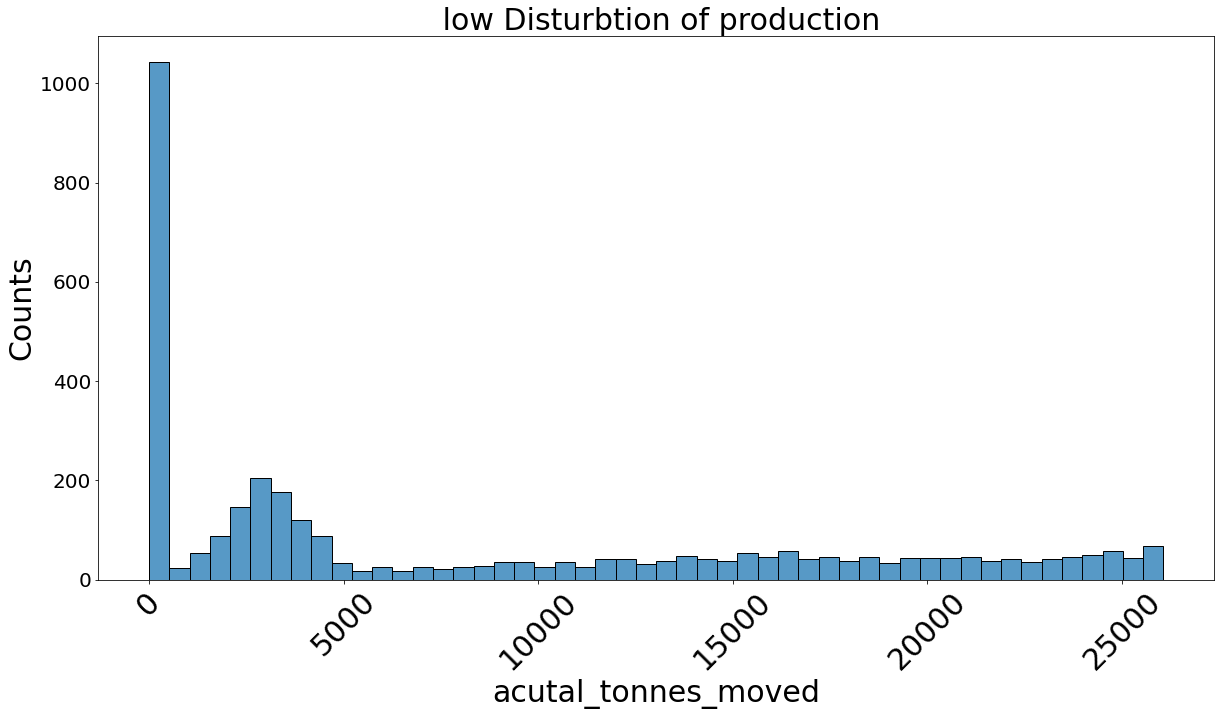

In [118]:
plt.figure(figsize=(20,10))
sns.histplot(Low_production['acutal_tonnes_moved'],bins=50)
plt.title(" low Disturbtion of production",size=30)
plt.xticks(rotation=45,size=30)
plt.xlabel("acutal_tonnes_moved",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=20)
plt.show()

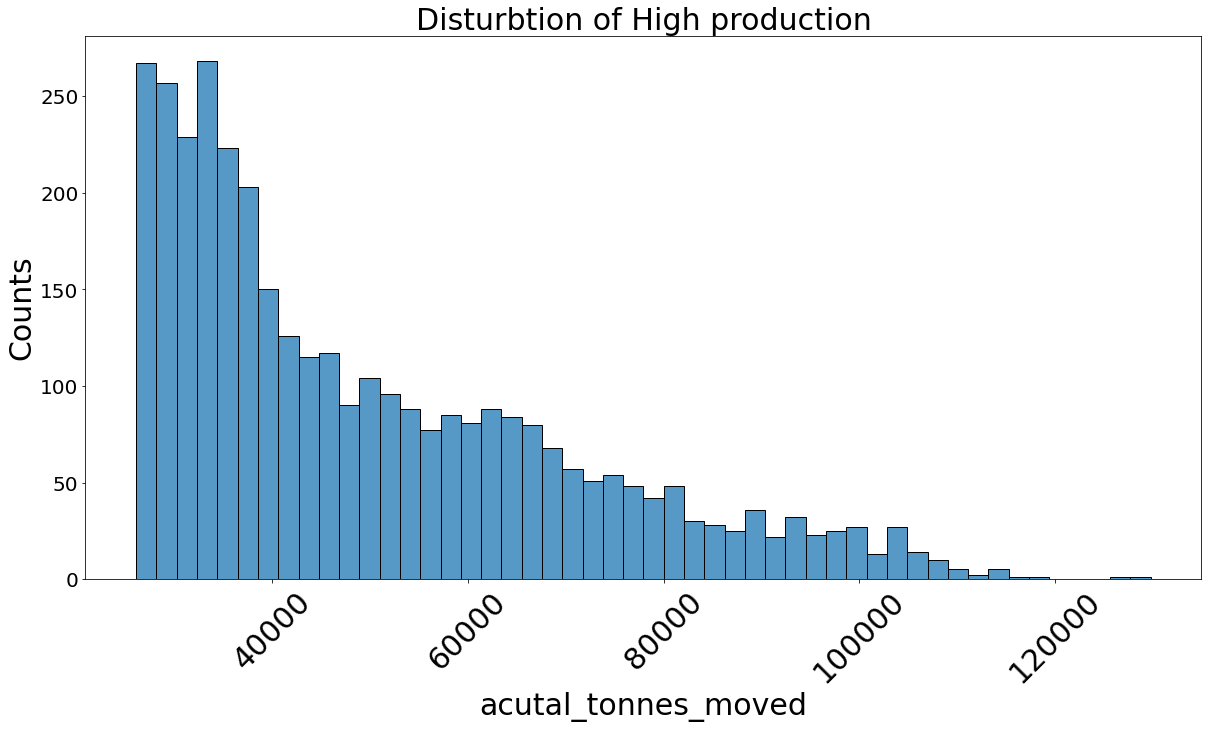

In [119]:
plt.figure(figsize=(20,10))
sns.histplot(High_Production['acutal_tonnes_moved'],bins=50)
plt.title("Disturbtion of High production",size=30)
plt.xticks(rotation=45,size=30)
plt.xlabel("acutal_tonnes_moved",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=20)
plt.show()

In [120]:



# Using 26078 tonnes  as the Threshold for the production which is the mean
High_Production_Accid=sf_prod[sf_prod['acutal_tonnes_moved']>=26078]
Low_production_Accid=sf_prod[sf_prod['acutal_tonnes_moved']<26078]

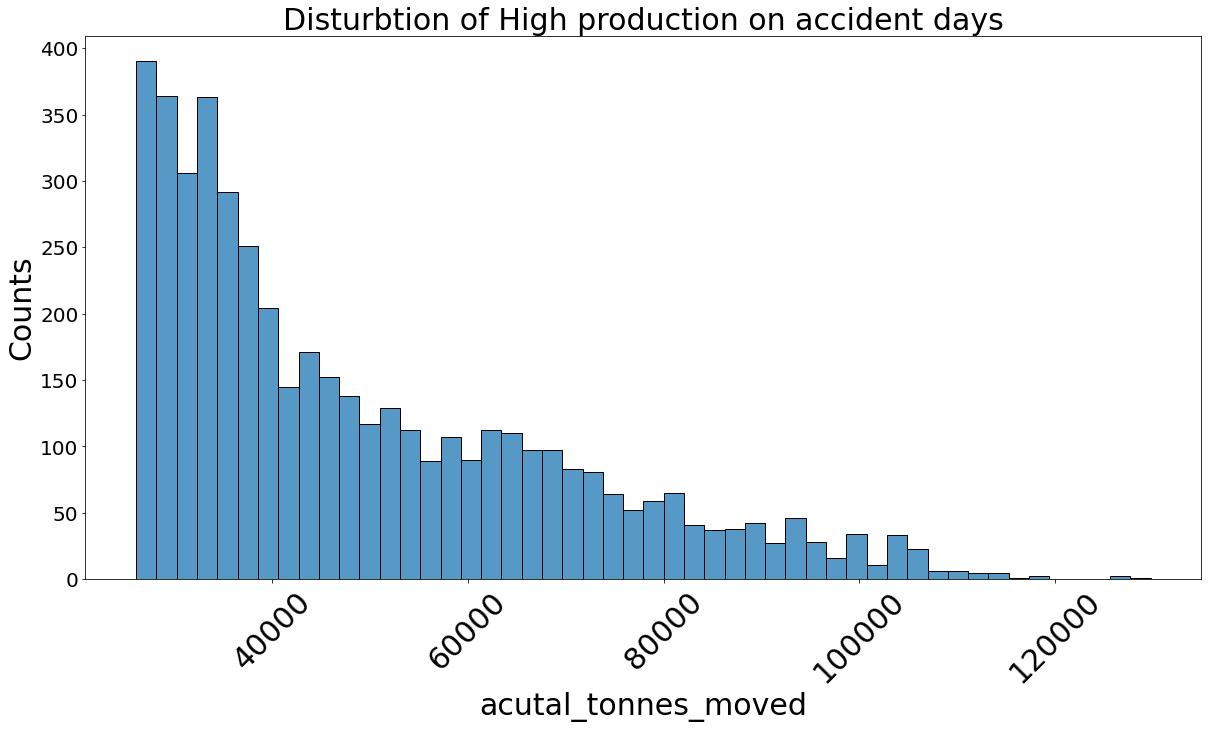

In [121]:
plt.figure(figsize=(20,10))
sns.histplot(High_Production_Accid['acutal_tonnes_moved'],bins=50)
plt.title("Disturbtion of High production on accident days",size=30)
plt.xticks(rotation=45,size=30)
plt.xlabel("acutal_tonnes_moved",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=20)
plt.show()

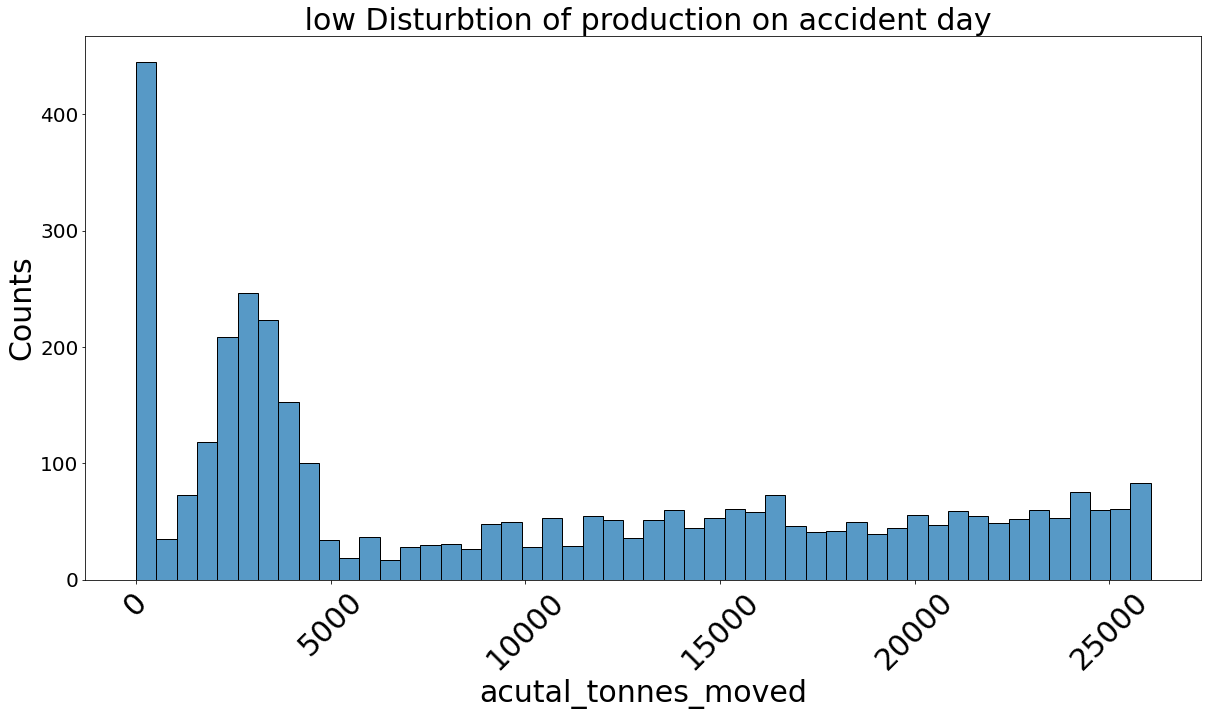

In [122]:
plt.figure(figsize=(20,10))
sns.histplot(Low_production_Accid['acutal_tonnes_moved'],bins=50)
plt.title(" low Disturbtion of production on accident day",size=30)
plt.xticks(rotation=45,size=30)
plt.xlabel("acutal_tonnes_moved",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=20)
plt.show()

### Do new employees suffer more safety incidents compared to more experienced employees? How do their safety incidents differ?

In [123]:
new_emp=emp_start.copy()

In [124]:
import datetime
new_emp=emp_start.dropna(thresh=2)
current_time=datetime.datetime.now()
new_emp.replace(to_replace = np.nan, value = current_time,inplace=True) 
new_emp

,name_hash,start_date,end_date
0,f4b827f935e91c19,2016-09-28T00:00:00Z,2017-12-25T00:00:00Z
1,b0450de853e8d2b1,2016-09-28T00:00:00Z,2017-01-03T00:00:00Z
2,d13d005723262d82,2016-09-28T00:00:00Z,2018-02-06T00:00:00Z
3,add230c7c5f560d6,2016-09-28T00:00:00Z,2017-10-30T00:00:00Z
4,78c99eb7417e0db2,2020-10-01T00:00:00Z,2022-12-05 12:34:21.087652
...,...,...,...
3147,c7b33a0ad84d7c9c,2021-05-20T00:00:00Z,2021-12-22T00:00:00Z
3148,b48f49fdeb4486ad,2021-05-13T00:00:00Z,2022-12-05 12:34:21.087652
3149,1ab348cb08e6d305,2021-05-11T00:00:00Z,2021-07-31T00:00:00Z
3150,c476a84c4c3de343,2021-05-11T00:00:00Z,2021-08-27T00:00:00Z


In [125]:
new_emp["end_date"]=pd.to_datetime(new_emp["end_date"])
new_emp["start_date"]= pd.to_datetime(new_emp["start_date"])

In [126]:
## drop the missing person name column
person_safety=safety.dropna(subset=['PersonName_hashed'])

In [127]:
# rename the column
person_safety.rename(columns={"PersonName_hashed":"name_hash"},inplace=True)


In [129]:
## drop the missing timeband column
time_safety=safety.dropna(subset=['TimeBand'])

In [130]:
time_safety

,site_key_hashed,WorkGroupId,day,event_time,event_dt,event_reported_time,event_reported_dt,EventId,AgencyOfInjuryId,AgencyOfInjury,AgencyOfInjuryDescription,BodyPartId,BodyPart,BodyPartDescription,LostTime,PersonName_hashed,StaffContractor,OrganisationName_hashed,InjuryTypeCode,Injury,Reportable,Significant,MechanismOfInjuryId,MechanismOfInjury,MechanismOfInjuryDecription,NatureOfInjury,NatureOfInjuryDecription,shift_commenced_day,shift_commenced_time,derived_shift_start_dt,shift_end_day,shift_end_time,derived_shift_end_dt,TimeBand,LTIDays
6028,6d4b7ee99aebdab7,230,2020-08-25,2022-12-05 01:15:00,2020-08-25 01:15:00+00:00,NaT,NaT,2331,14,Underground,Underground environment,11,Leg / Hip,Hips and legs,True,c6e1c3fea869fad6,S,a23b14832a955b8e,LTI,Lost Time Injury,True,False,2,Falls from a height,Falls from a height,Sprain and strains,Sprains and strains of joints and adjacent mus...,2020-08-29,18:00:00,2020-08-29T18:00:00Z,2020-08-29,4:30:00 AM,2020-08-29T04:30:00Z,> 1 yr,751
6039,6d4b7ee99aebdab7,221,2020-09-01,2022-12-05 16:20:00,2020-09-01 16:20:00+00:00,NaT,NaT,2342,9,Chemicals,Chemicals,4,Face,Face,False,a2014bc9d695d292,NaN,a23b14832a955b8e,FAI,First Aid Injury,False,False,17,Other chemical,Other contact with chemical or substance (incl...,Superficial,Superficial injury,2020-09-02,6:00:00,2020-09-02T06:00:00Z,2020-09-02,4:30:00 PM,2020-09-02T16:30:00Z,> 1 yr,744
6063,30c6f1d4634a0268,108,2020-09-21,2022-12-05 15:00:00,2020-09-21 15:00:00+00:00,NaT,NaT,136269,3,Mobile Plant,Mobile Plant,10,Hand / Fingers,Hands and fingers,False,79ac08af1b1c56ac,S,a23b14832a955b8e,Occ Inj,Occupational Injury/illness,False,False,10,Repetitive movement,Repetitive movement with low muscle loading,Other,Other and unspecified injuries,2020-10-16,6:00:00,2020-10-16T06:00:00Z,2020-10-16,6:00:00 PM,2020-10-16T18:00:00Z,> 1 yr,724
6064,30c6f1d4634a0268,108,2020-09-21,2022-12-05 15:00:00,2020-09-21 15:00:00+00:00,NaT,NaT,136269,3,Mobile Plant,Mobile Plant,10,Hand / Fingers,Hands and fingers,False,79ac08af1b1c56ac,S,a23b14832a955b8e,Occ Inj,Occupational Injury/illness,False,False,10,Repetitive movement,Repetitive movement with low muscle loading,Sprain and strains,Sprains and strains of joints and adjacent mus...,2020-10-29,6:00:00,2020-10-29T06:00:00Z,2020-10-29,6:00:00 PM,2020-10-29T18:00:00Z,> 1 yr,724
6067,49d11ae6ef35a6f5,156,2020-09-23,2022-12-05 14:00:00,2020-09-23 14:00:00+00:00,NaT,NaT,137381,12,Outdoor environment,Outdoor environment,8,Trunk,Trunk (other than back and excluding internal ...,True,c327094f4f4f05f6,S,a23b14832a955b8e,RWI,Restricted Work Injury,True,False,3,Falls same level,Falls on the same level (including trips and s...,Other,Other and unspecified injuries,2020-10-19,6:00:00,2020-10-19T06:00:00Z,2020-10-19,6:00:00 PM,2020-10-19T18:00:00Z,> 1 yr,722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6963,6d4b7ee99aebdab7,240,2022-09-06,2022-12-05 18:30:00,2022-09-06 18:30:00+00:00,2022-12-05 18:40:00,2022-09-06 18:40:00+00:00,590512,4,Road transport,Road transport,4,Face,Face,False,8be2aec03ed4bfe5,S,a23b14832a955b8e,FAI,First Aid Injury,False,True,21,Vehicle accident,Vehicle accident,Superficial,Superficial injury,2022-09-08,18:00:00,2022-09-08T18:00:00Z,2022-09-08,6:00:00 AM,2022-09-08T06:00:00Z,4 Mths - 1 yr,9
6965,6d4b7ee99aebdab7,232,2022-09-08,2022-12-05 03:30:00,2022-09-08 03:30:00+00:00,2022-12-05 12:00:00,2022-09-08 12:00:00+00:00,590900,9,Chemicals,Chemicals,14,Multiple,Multiple locations (more than one of the above),False,a91cd662660ae821,S,a23b14832a955b8e,NoTreatmnt,No Treatment,False,False,17,Other chemical,Other contact with chemical or substance (incl...,Other,Other and unspecified injuries,2022-09-12,18:00:00,2022-09-12T18:00:00Z,2022-09-12,6:00:00 AM,2022-09-12T06:00:00Z,> 1 yr,7
6966,a74b41132d0ad387,616,2022-09-08,2022-12-05 16:31:00,2022-09-08 16:31:00+00:00,2022-12-05 16:31:00,2022-09-08 16:31:00+00:00,591241,18,Huma

In [131]:
time_safety["TimeBand"].value_counts()

> 1 yr           173
4 Mths - 1 yr     43
1-3 Mths          27
< 1 Mth           19
Name: TimeBand, dtype: int64

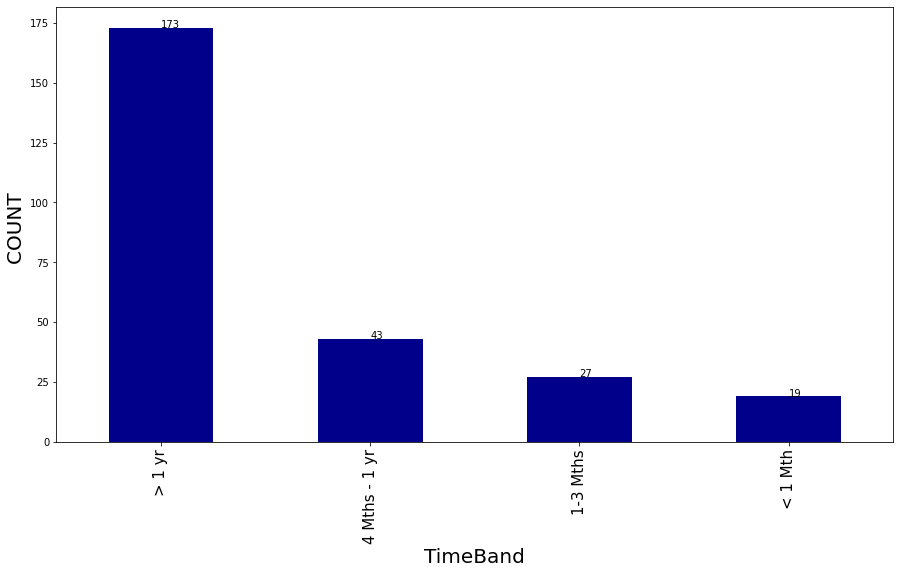

In [132]:

#Teams involved in site_key_hashed(6d4b7ee99aebdab7 )
plt.figure(figsize=(15,8))
WorkGroup_count=time_safety["TimeBand"].value_counts()
ax=WorkGroup_count.plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("TimeBand",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("",size=25)
plt.show()

### When employees move in / out of a workgroup, is there any change in the observed safety incidents?

In [133]:
person_workgroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28856 entries, 0 to 28855
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name_hash      28856 non-null  object
 1   work_group_id  28856 non-null  int64 
 2   from_date      28856 non-null  object
 3   to_date        28856 non-null  object
dtypes: int64(1), object(3)
memory usage: 901.9+ KB


In [134]:
person_workgroup.name_hash.value_counts()

36dc5a87a7ebf371    6
d924a1a7d06567ef    5
f217446f2a46de68    4
f551fd1451885da9    4
c93c86495df9319b    4
                   ..
61caaca76696d0cc    1
19bc7233f1bda60f    1
24ca62d1d6a849db    1
918a80fdc3e18a5a    1
230dda36993965e7    1
Name: name_hash, Length: 25745, dtype: int64

In [135]:
# Those who moved from one working group to another
act_vc = person_workgroup.name_hash.value_counts()
selected_name = act_vc[act_vc > 1].keys()
selected_name

Index(['36dc5a87a7ebf371', 'd924a1a7d06567ef', 'f217446f2a46de68',
       'f551fd1451885da9', 'c93c86495df9319b', 'dbd349519101d009',
       'd86f26437c25b654', 'c22c36a7737bad42', 'ceed9e82d81bc501',
       '1055bf7cac8d4243',
       ...
       '0dab869385350d8f', 'f2460e2261a6af63', 'a8e13d7f4cbf9481',
       '68639847b206a997', 'a9e97f9d60940a4e', '7867ff29d3d09089',
       '4285bf873245c2dd', '3460c731283ad7f5', '7179907763f1e1d2',
       'b397e0226aaed170'],
      dtype='object', length=2978)

In [136]:
len(selected_name)

2978

In [137]:

more_workgroup= person_workgroup[person_workgroup.name_hash.isin(selected_name)].reset_index(drop=True)
more_workgroup[:10]

,name_hash,work_group_id,from_date,to_date
0,ccf429942932ab41,2,1900-01-01T00:00:00Z,2022-03-20T00:00:00Z
1,ccf429942932ab41,752,2022-03-21T00:00:00Z,2999-01-01T00:00:00Z
2,809cb19856515de9,325,2021-07-12T00:00:00Z,2999-01-01T00:00:00Z
3,809cb19856515de9,325,1900-01-01T00:00:00Z,2021-07-11T00:00:00Z
4,0dab869385350d8f,594,2021-07-06T00:00:00Z,2999-01-01T00:00:00Z
5,0dab869385350d8f,2,1900-01-01T00:00:00Z,2021-07-05T00:00:00Z
6,8ac50a738c1c66d7,613,1900-01-01T00:00:00Z,2022-05-16T00:00:00Z
7,8ac50a738c1c66d7,605,2022-05-17T00:00:00Z,2999-01-01T00:00:00Z
8,9c6458fbaa344b59,325,1900-01-01T00:00:00Z,2021-07-11T00:00:00Z
9,9c6458fbaa344b59,325,2021-07-12T00:00:00Z,2999-01-01T00:00:00Z


In [138]:
emp_workgroup= emp_start[emp_start.name_hash.isin(selected_name)].reset_index(drop=True)
emp_workgroup

,name_hash,start_date,end_date
0,3aa7cdb094831405,2020-10-01T00:00:00Z,NaN
1,8ea82b4255cd540b,2020-10-01T00:00:00Z,NaN
2,d6b524d46d3506e1,2020-10-01T00:00:00Z,2021-03-29T00:00:00Z
3,0243feeb0a739de8,2020-10-01T00:00:00Z,NaN
4,74e83704a2359df3,2020-10-01T00:00:00Z,NaN
...,...,...,...
373,4e1299deba8cba17,2022-05-25T00:00:00Z,2022-08-25T00:00:00Z
374,4e1299deba8cba17,2021-05-11T00:00:00Z,2022-08-25T00:00:00Z
375,4e1299deba8cba17,2022-05-25T00:00:00Z,2021-08-27T00:00:00Z
376,4e1299deba8cba17,2021-05-11T00:00:00Z,2021-08-27T00:00:00Z


In [139]:
person_safety.head()

,site_key_hashed,WorkGroupId,day,event_time,event_dt,event_reported_time,event_reported_dt,EventId,AgencyOfInjuryId,AgencyOfInjury,AgencyOfInjuryDescription,BodyPartId,BodyPart,BodyPartDescription,LostTime,name_hash,StaffContractor,OrganisationName_hashed,InjuryTypeCode,Injury,Reportable,Significant,MechanismOfInjuryId,MechanismOfInjury,MechanismOfInjuryDecription,NatureOfInjury,NatureOfInjuryDecription,shift_commenced_day,shift_commenced_time,derived_shift_start_dt,shift_end_day,shift_end_time,derived_shift_end_dt,TimeBand,LTIDays
6,bf4065199d70073b,692,2000-08-29,2022-12-05 01:00:00,2000-08-29 01:00:00+00:00,2022-12-05 09:42:00,2000-08-29 09:42:00+00:00,557747,2,Fixed Plant,Machinery and Fixed Plant,9,Arms / Shoulder,Shoulders and arms,True,48d5662892b71549,S,NaN,MTI,Medical Treatment Injury,True,False,11,Muscular stress,Other muscular stress,Contusion,Contusion with intact skin surface and crushin...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8052
7,bf4065199d70073b,692,2000-08-29,2022-12-05 01:00:00,2000-08-29 01:00:00+00:00,2022-12-05 09:42:00,2000-08-29 09:42:00+00:00,557747,2,Fixed Plant,Machinery and Fixed Plant,9,Arms / Shoulder,Shoulders and arms,True,48d5662892b71549,S,NaN,MTI,Medical Treatment Injury,True,False,11,Muscular stress,Other muscular stress,Contusion,Contusion with intact skin surface and crushin...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8052
51,bf4065199d70073b,771,2002-10-14,2022-12-05 01:00:00,2002-10-14 01:00:00+00:00,2022-12-05 12:42:00,2002-10-14 12:42:00+00:00,555988,11,Other materials,"Other materials, substances or objects",7,Back,Back,True,67d53a7ef2e59bc5,NaN,NaN,LTI,Lost Time Injury,True,False,11,Muscular stress,Other muscular stress,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,7276
53,bf4065199d70073b,771,2002-10-15,2022-12-05 08:00:00,2002-10-15 08:00:00+00:00,2022-12-05 07:56:00,2002-10-15 07:56:00+00:00,555367,3,Mobile Plant,Mobile Plant,11,Leg / Hip,Hips and legs,True,34c786965fd325ce,S,NaN,MTI,Medical Treatment Injury,True,False,11,Muscular stress,Other muscular stress,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,7275
57,bf4065199d70073b,692,2002-10-22,2022-12-05 16:30:00,2002-10-22 16:30:00+00:00,2022-12-05 10:28:00,2002-10-22 10:28:00+00:00,557978,7,Non-powered tools,Non-powered handtools,10,Hand / Fingers,Hands and fingers,False,bc824cea5559e371,NaN,NaN,FAI,First Aid Injury,False,False,11,Muscular stress,Other muscular stress,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,7268


In [140]:
safety.duplicated().sum()

29

In [141]:

# work_group to know no of type they receive person
more_workgroup["work_group_id"].value_counts()

2      1924
752    1774
589     152
591     117
232      80
       ... 
689       1
323       1
643       1
365       1
349       1
Name: work_group_id, Length: 304, dtype: int64

### When individuals come off of leave, or have a significant change in their roster, does this affect the nature / prevalence of their safety incidents?

In [142]:
roster["leave_type"].unique()

array([nan, 'Annual Leave', 'Unpaid Leave', 'Unpaid Sick Leave',
       'Personal Leave', 'Personal Days', 'Sick Leave', 'Vacation Leave',
       'Compassionate Leave', 'Personal Leave - Public Holiday',
       'Leave of Absence (Unpaid)', 'Leave of Absence (Paid)',
       'Special Paid Leave', 'Short Term Disability',
       'Family Medical Leave (Unpaid)', 'Emergency Days (Unpaid)',
       'Bereavement Leave (Unpaid)', 'Unpaid Parental Leave',
       'Unpaid Parental Primary Leave', 'Paid Parental Primary Leave',
       'Bereavement Leave', 'Relocation Leave',
       'Paid Parental Secondary Leave', 'Long Service Leave',
       'Paternity Leave', 'Long Term Disability',
       'Community Service - Paid', 'Maternity Leave',
       'Bereavement Leave (Paid)', 'Unfit for Work (Unpaid)',
       'Absent without Leave (AWOL)', 'Workers Compensation',
       'Unpaid Parental Secondary Leave', 'Annual Leave - Public Holiday',
       'Half Paid Parental Primary Leave', 'GDP Leave (Paid)',
   

In [143]:

person_safety.head()

,site_key_hashed,WorkGroupId,day,event_time,event_dt,event_reported_time,event_reported_dt,EventId,AgencyOfInjuryId,AgencyOfInjury,AgencyOfInjuryDescription,BodyPartId,BodyPart,BodyPartDescription,LostTime,name_hash,StaffContractor,OrganisationName_hashed,InjuryTypeCode,Injury,Reportable,Significant,MechanismOfInjuryId,MechanismOfInjury,MechanismOfInjuryDecription,NatureOfInjury,NatureOfInjuryDecription,shift_commenced_day,shift_commenced_time,derived_shift_start_dt,shift_end_day,shift_end_time,derived_shift_end_dt,TimeBand,LTIDays
6,bf4065199d70073b,692,2000-08-29,2022-12-05 01:00:00,2000-08-29 01:00:00+00:00,2022-12-05 09:42:00,2000-08-29 09:42:00+00:00,557747,2,Fixed Plant,Machinery and Fixed Plant,9,Arms / Shoulder,Shoulders and arms,True,48d5662892b71549,S,NaN,MTI,Medical Treatment Injury,True,False,11,Muscular stress,Other muscular stress,Contusion,Contusion with intact skin surface and crushin...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8052
7,bf4065199d70073b,692,2000-08-29,2022-12-05 01:00:00,2000-08-29 01:00:00+00:00,2022-12-05 09:42:00,2000-08-29 09:42:00+00:00,557747,2,Fixed Plant,Machinery and Fixed Plant,9,Arms / Shoulder,Shoulders and arms,True,48d5662892b71549,S,NaN,MTI,Medical Treatment Injury,True,False,11,Muscular stress,Other muscular stress,Contusion,Contusion with intact skin surface and crushin...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8052
51,bf4065199d70073b,771,2002-10-14,2022-12-05 01:00:00,2002-10-14 01:00:00+00:00,2022-12-05 12:42:00,2002-10-14 12:42:00+00:00,555988,11,Other materials,"Other materials, substances or objects",7,Back,Back,True,67d53a7ef2e59bc5,NaN,NaN,LTI,Lost Time Injury,True,False,11,Muscular stress,Other muscular stress,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,7276
53,bf4065199d70073b,771,2002-10-15,2022-12-05 08:00:00,2002-10-15 08:00:00+00:00,2022-12-05 07:56:00,2002-10-15 07:56:00+00:00,555367,3,Mobile Plant,Mobile Plant,11,Leg / Hip,Hips and legs,True,34c786965fd325ce,S,NaN,MTI,Medical Treatment Injury,True,False,11,Muscular stress,Other muscular stress,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,7275
57,bf4065199d70073b,692,2002-10-22,2022-12-05 16:30:00,2002-10-22 16:30:00+00:00,2022-12-05 10:28:00,2002-10-22 10:28:00+00:00,557978,7,Non-powered tools,Non-powered handtools,10,Hand / Fingers,Hands and fingers,False,bc824cea5559e371,NaN,NaN,FAI,First Aid Injury,False,False,11,Muscular stress,Other muscular stress,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,7268


In [144]:
## drop the missing leave column
leave=roster.dropna(subset=['leave_type'])

In [145]:
leave

,date,name_hash,scheduled_work_hours,leave_type,leave_start_date_utc,leave_end_date_utc
38,2021-12-09,45888e1fa8dc1ba4,RDO,Annual Leave,2021-12-09,2021-12-15
39,2021-12-10,45888e1fa8dc1ba4,RDO,Annual Leave,2021-12-09,2021-12-15
40,2021-12-11,45888e1fa8dc1ba4,RDO,Annual Leave,2021-12-09,2021-12-15
41,2021-12-12,45888e1fa8dc1ba4,RDO,Annual Leave,2021-12-09,2021-12-15
42,2021-12-13,45888e1fa8dc1ba4,RDO,Annual Leave,2021-12-09,2021-12-15
...,...,...,...,...,...,...
2971499,2022-12-16,a04e4b0617b577a2,RDO,Vacation Leave,2022-12-16,2022-12-20
2971500,2022-12-17,a04e4b0617b577a2,RDO,Vacation Leave,2022-12-16,2022-12-20
2971501,2022-12-18,a04e4b0617b577a2,RDO,Vacation Leave,2022-12-16,2022-12-20
2971502,2022-12-19,a04e4b0617b577a2,RDO,Vacation Leave,2022-12-16,2022-12-20


In [146]:
dataset =leave.groupby(['name_hash', 'leave_type',"leave_start_date_utc","leave_end_date_utc" ]).size().reset_index().\
    rename(columns={0: 'count'}).\
        sort_values(['name_hash', 'leave_type', 'count'], ascending=False)

In [147]:
dataset

,name_hash,leave_type,leave_start_date_utc,leave_end_date_utc,count
40640,ffec84992f6303f8,Short Term Disability,2021-02-10,2021-07-18,159
40639,ffec84992f6303f8,Short Term Disability,2021-01-20,2021-02-09,21
40638,ffec84992f6303f8,Personal Days,2020-12-25,2020-12-26,2
40637,ffec84992f6303f8,Personal Days,2020-11-11,2020-11-11,1
40636,ffec84992f6303f8,Long Term Disability,2021-07-19,2022-10-15,454
...,...,...,...,...,...
5,0003aeb9aa5c6983,Annual Leave,2021-07-03,2021-07-04,2
6,0003aeb9aa5c6983,Annual Leave,2021-12-12,2021-12-13,2
8,0003aeb9aa5c6983,Annual Leave,2022-08-26,2022-08-27,2
1,0003aeb9aa5c6983,Annual Leave,2020-08-16,2020-08-16,1


In [148]:
dataset[dataset["count"]>100]

,name_hash,leave_type,leave_start_date_utc,leave_end_date_utc,count
40640,ffec84992f6303f8,Short Term Disability,2021-02-10,2021-07-18,159
40636,ffec84992f6303f8,Long Term Disability,2021-07-19,2022-10-15,454
40385,fdfac4eca117c9f4,Maternity Leave,2021-08-15,2022-11-18,461
40255,fd7c6caf1b64ac3d,Unpaid Parental Leave,2020-10-16,2021-04-14,181
40036,fba6f15152499bbb,Unpaid Parental Primary Leave,2022-08-24,2023-08-23,365
...,...,...,...,...,...
309,018546766f593a7c,Long Term Disability,2021-05-01,2022-10-15,362
308,018546766f593a7c,Long Term Disability,2021-05-01,2022-03-19,171
287,017ca01aa3bc776e,Leave of Absence (Unpaid),2021-05-01,2021-08-31,123
189,00dccf614509f47b,Long Term Disability,2020-10-16,2022-10-15,730


### Does the amount of leave taken within a team affect the observed safety incidents within that team?

### Is there any correlation with the amount of hours worked (by contractors / staff) and the amount / severity of safety incidents?

In [149]:
labour_hours

,month_year,site_key_hashed,worker_type,total_hours_worked
0,Jan-2019,a74b41132d0ad387,Contractor,41532.0
1,Feb-2019,a74b41132d0ad387,Contractor,38222.0
2,Mar-2019,a74b41132d0ad387,Contractor,70537.0
3,Apr-2019,a74b41132d0ad387,Contractor,47851.0
4,May-2019,a74b41132d0ad387,Contractor,61032.0
...,...,...,...,...
2073,Apr-2019,6d4b7ee99aebdab7,Contractor,76368.0
2074,May-2019,6d4b7ee99aebdab7,Contractor,78826.0
2075,Mar-2019,6d4b7ee99aebdab7,Staff,140906.0
2076,Apr-2019,6d4b7ee99aebdab7,Staff,140758.0


In [150]:
labour_hours["site_key_hashed"].nunique()

14

In [151]:
safety.head()

,site_key_hashed,WorkGroupId,day,event_time,event_dt,event_reported_time,event_reported_dt,EventId,AgencyOfInjuryId,AgencyOfInjury,AgencyOfInjuryDescription,BodyPartId,BodyPart,BodyPartDescription,LostTime,PersonName_hashed,StaffContractor,OrganisationName_hashed,InjuryTypeCode,Injury,Reportable,Significant,MechanismOfInjuryId,MechanismOfInjury,MechanismOfInjuryDecription,NatureOfInjury,NatureOfInjuryDecription,shift_commenced_day,shift_commenced_time,derived_shift_start_dt,shift_end_day,shift_end_time,derived_shift_end_dt,TimeBand,LTIDays
0,bf4065199d70073b,771,2000-06-25,2022-12-05 21:30:00,2000-06-25 21:30:00+00:00,2022-12-05 22:00:00,2000-06-25 22:00:00+00:00,560120,12,Outdoor environment,Outdoor environment,10,Hand / Fingers,Hands and fingers,True,NaN,NaN,NaN,MTI,Medical Treatment Injury,True,False,3,Falls same level,Falls on the same level (including trips and s...,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8117
1,bf4065199d70073b,771,2000-06-25,2022-12-05 01:30:00,2000-06-25 01:30:00+00:00,2022-12-05 02:00:00,2000-06-25 02:00:00+00:00,555108,2,Fixed Plant,Machinery and Fixed Plant,6,Neck,Neck,True,NaN,NaN,NaN,MTI,Medical Treatment Injury,True,False,11,Muscular stress,Other muscular stress,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8117
2,bf4065199d70073b,771,2000-07-18,2022-12-05 06:10:00,2000-07-18 06:10:00+00:00,2022-12-05 07:12:00,2000-07-18 07:12:00+00:00,554760,3,Mobile Plant,Mobile Plant,6,Neck,Neck,True,NaN,NaN,NaN,RWI,Restricted Work Injury,True,False,11,Muscular stress,Other muscular stress,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8094
3,bf4065199d70073b,771,2000-07-18,2022-12-05 06:10:00,2000-07-18 06:10:00+00:00,2022-12-05 07:12:00,2000-07-18 07:12:00+00:00,554760,2,Fixed Plant,Machinery and Fixed Plant,14,Multiple,Multiple locations (more than one of the above),True,NaN,NaN,NaN,MTI,Medical Treatment Injury,True,False,11,Muscular stress,Other muscular stress,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8094
4,bf4065199d70073b,771,2000-08-12,2022-12-05 11:10:00,2000-08-12 11:10:00+00:00,2022-12-05 11:41:00,2000-08-12 11:41:00+00:00,556554,6,Powered equipment,"Powered equipment, tools and appliances",10,Hand / Fingers,Hands and fingers,True,NaN,NaN,NaN,MTI,Medical Treatment Injury,True,False,4,Hitting objects,Hitting objects with a part of the body,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8069


In [152]:
labour_hours["worker_type"].value_counts()

Staff         1057
Contractor    1021
Name: worker_type, dtype: int64

In [156]:
## drop the missing timeband column
contra_safety=safety.dropna(subset=['StaffContractor'])

In [157]:
contra_safety["Month_Year"]=pd.to_datetime(contra_safety["day"]).dt.strftime('%Y-%m')

In [158]:
dataset1 =contra_safety.groupby(['Month_Year','StaffContractor',"site_key_hashed" ]).size().reset_index().\
    rename(columns={0: 'count'}).\
        sort_values(['Month_Year', 'StaffContractor'], ascending=False)

In [159]:
dataset1


,Month_Year,StaffContractor,site_key_hashed,count
1278,2022-09,S,49d11ae6ef35a6f5,1
1279,2022-09,S,53030efca88e7301,1
1280,2022-09,S,6d4b7ee99aebdab7,4
1281,2022-09,S,bf4065199d70073b,1
1276,2022-09,C,6d4b7ee99aebdab7,1
...,...,...,...,...
4,2004-04,S,bf4065199d70073b,1
3,2004-01,S,bf4065199d70073b,1
2,2002-11,S,bf4065199d70073b,1
1,2002-10,S,bf4065199d70073b,1


In [160]:
labour_hours

,month_year,site_key_hashed,worker_type,total_hours_worked
0,Jan-2019,a74b41132d0ad387,Contractor,41532.0
1,Feb-2019,a74b41132d0ad387,Contractor,38222.0
2,Mar-2019,a74b41132d0ad387,Contractor,70537.0
3,Apr-2019,a74b41132d0ad387,Contractor,47851.0
4,May-2019,a74b41132d0ad387,Contractor,61032.0
...,...,...,...,...
2073,Apr-2019,6d4b7ee99aebdab7,Contractor,76368.0
2074,May-2019,6d4b7ee99aebdab7,Contractor,78826.0
2075,Mar-2019,6d4b7ee99aebdab7,Staff,140906.0
2076,Apr-2019,6d4b7ee99aebdab7,Staff,140758.0


In [161]:
labour_hours["Month_Year"]=pd.to_datetime(labour_hours["month_year"]).dt.strftime('%Y-%m')

In [162]:
labour_hours

,month_year,site_key_hashed,worker_type,total_hours_worked,Month_Year
0,Jan-2019,a74b41132d0ad387,Contractor,41532.0,2019-01
1,Feb-2019,a74b41132d0ad387,Contractor,38222.0,2019-02
2,Mar-2019,a74b41132d0ad387,Contractor,70537.0,2019-03
3,Apr-2019,a74b41132d0ad387,Contractor,47851.0,2019-04
4,May-2019,a74b41132d0ad387,Contractor,61032.0,2019-05
...,...,...,...,...,...
2073,Apr-2019,6d4b7ee99aebdab7,Contractor,76368.0,2019-04
2074,May-2019,6d4b7ee99aebdab7,Contractor,78826.0,2019-05
2075,Mar-2019,6d4b7ee99aebdab7,Staff,140906.0,2019-03
2076,Apr-2019,6d4b7ee99aebdab7,Staff,140758.0,2019-04


In [163]:
labour_hours=labour_hours.sort_values("Month_Year")

In [164]:
dataset1=dataset1.sort_values("Month_Year")

In [165]:
corr_data=dataset1.merge(labour_hours[["Month_Year","worker_type","total_hours_worked"]],on="Month_Year")

In [166]:
corr_data

,Month_Year,StaffContractor,site_key_hashed,count,worker_type,total_hours_worked
0,2011-07,S,bf4065199d70073b,1,Staff,2105.0
1,2011-07,S,bf4065199d70073b,1,Contractor,0.0
2,2011-07,S,bf4065199d70073b,1,Staff,14604.0
3,2011-07,S,bf4065199d70073b,1,Contractor,36873.0
4,2011-07,S,bf4065199d70073b,1,Contractor,17803.0
...,...,...,...,...,...,...
19302,2022-08,S,bf4065199d70073b,6,Contractor,48833.0
19303,2022-08,S,bf4065199d70073b,6,Contractor,60548.0
19304,2022-08,S,bf4065199d70073b,6,Staff,26520.0
19305,2022-08,S,bf4065199d70073b,6,Contractor,500.0


In [167]:
corr_data.corr()

,count,total_hours_worked
count,1.000000,-0.014701
total_hours_worked,-0.014701,1.000000


<AxesSubplot:>

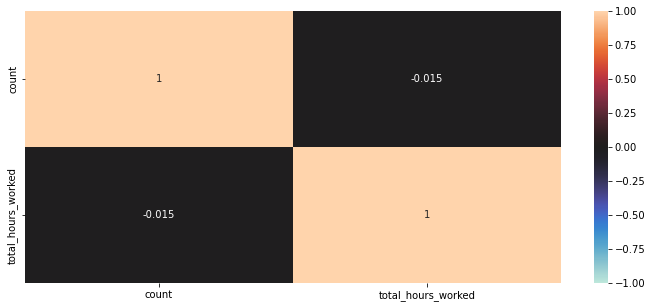

In [168]:
plt.figure(figsize=(12,5))
sns.heatmap(corr_data.corr(), annot = True, vmin=-1, vmax=1, center= 0)

### Do incidents tend to reduce after a large amount of incidents have been recorded, or after a significantly severe incident was recorded?



In [ ]:
safe=safety.copy()

In [ ]:
safe["Month_Year"]=pd.to_datetime(safe["day"]).dt.strftime('%Y-%m')

In [ ]:
Month_grp=safe.groupby(by="Month_Year")["Injury"].count().sort_values().reset_index(name="counts")


In [ ]:
Month_grp=Month_grp.sort_values("Month_Year")

In [ ]:
Month_grp.set_index("Month_Year",inplace=True)

In [ ]:
Month_grp

,counts
Month_Year,
2000-06,2
2000-07,2
2000-08,4
2000-10,1
2001-01,3
...,...
2022-05,36
2022-06,30
2022-07,35


In [ ]:
ts=Month_grp["counts"]

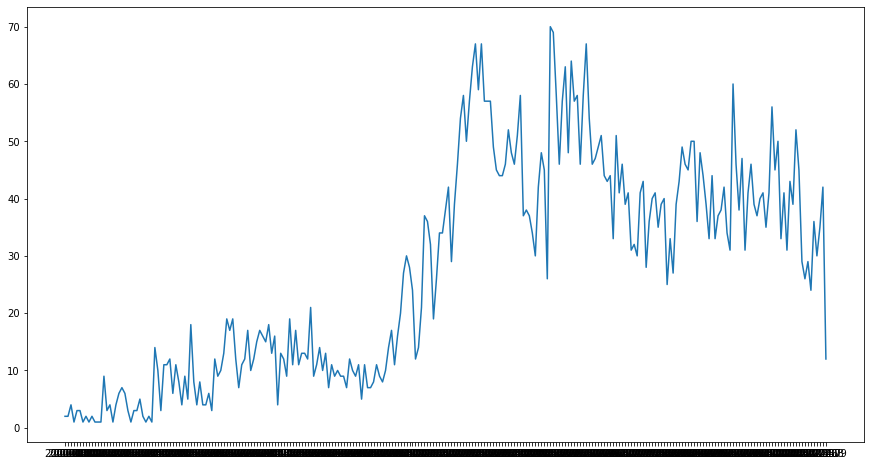

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(ts)
plt.show()

In [ ]:
ts.iplot()

## Develop approaches that allow the safety team to provide insights / trends / actions back to the wider-business on the safety performance across time.

### Can we conclude that safety performance has been improving across the business over-time? How do we know this? Are there any points in time where we observed large improvements to safety performance?

In [ ]:
ts.iplot()

### Can we flag when / where certain types of incidents are increasing so we can trigger some sort of interventionary action (extra education, preventative measures, risk controls, etc.)?

In [169]:
grp_injury=safety_new.groupby(by=["Month_Year","Injury"])["AgencyOfInjury",].count().sort_values(by="Month_Year").reset_index()

In [170]:
grp_injury

,Month_Year,Injury,AgencyOfInjury
0,2000-06,Medical Treatment Injury,2
1,2000-07,Medical Treatment Injury,1
2,2000-07,Restricted Work Injury,1
3,2000-08,Medical Treatment Injury,4
4,2000-10,Lost Time Injury,1
...,...,...,...
897,2022-08,Medical Treatment Injury,4
898,2022-09,Medical Treatment Injury,1
899,2022-09,No Treatment,2
900,2022-09,First Aid Injury,7


In [174]:
grp_injury.set_index("Month_Year",inplace=True)

In [177]:
fig = px.line(grp_injury, y='AgencyOfInjury', color='Injury')
fig.show()

### Are there any types of data that you believe we should be recording to help understand / reduce safety incidents, that we’re not?

>> Yes,data on how the use of PPA amd the kind of technology they are usibg.


## Identify where predictive models or machine learning approaches could provide value to the safety team to monitor / improve their safety performance

### Would you recommend the use of machine learning / predictive models as a means of better understanding safety incidents and driving safety performance improvements?

>> Yes,A predictive Machine Learning can help to predict the site location, team work involved and types of activities involved too. IT can also help to predict location of where a mineral can be found

### How do you expect the use of machine learning / predictive models to provide value for the safety team, or for the wider-business?

>> yes,using Unsupvised ML it can cluster region of accident. When a model predict accident to occur, there will more caution on how to work and the medical team will be ready availbale